**Заголовок:** 
Покупательская активность клинетов нтернет-магазин «В один клик»

**Описание проекта:** 
Отчёт интернет-магазина «В один клик» за прошлый период показал, что активность покупателей начала снижаться.
Для решения этой проблемы можно либо привлечь новых клиентов, либо удержать активность постоянных.
Первое считается не эффективным - о магазине и так знает большая часть целевой аудитории. 
Поэтому решено удерживать активность постоянных клиентов, что можно сделать с помощью персонализированных предложений.


**Цель исследования:**
Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Задачи**
- Разработать модель, которая предскажет вероятность снижения покупательской активности.
- Выделить сегмент покупателей, проанализировать его и предложить, как увеличить его покупательскую активность. 

**Ход исследования:** 

1. Загрузка данных

1. Предобработка данных 

1. Исследовательский анализ данных 

1. Объединение таблиц

1. Корреляционный анализ 

1. Использование пайплайнов

1. Анализ важности признаков

1. Сегментация покупателей

1. Итоговые выводы

## Библиотеки

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance

import shap

import phik

In [2]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

## Загрузка данных

In [3]:
def pd_read_csv_wrap(
    bname,
    *args,
    **kwargs
):
    df = pd.read_csv(
        f'{bname}.csv',
        *args,
        **kwargs
    )
    
    df.columns.name = bname
    
    display(df.info())
    display(df.head())
    
    return df

In [4]:
market_file = pd_read_csv_wrap('market_file')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

None

market_file,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [5]:
market_money = pd_read_csv_wrap('market_money')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

market_money,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [6]:
market_time = pd_read_csv_wrap('market_time')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

market_time,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [7]:
money = pd_read_csv_wrap('money', sep=';', decimal=',')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

money,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


### Итог
Данные загрузились корректно, типы данных определились верно.

## Предобработка данных

### Пропуски

In [8]:
for df in market_file, market_money, market_time, money:
    display(df.isna().sum())

market_file
id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64

market_money
id         0
Период     0
Выручка    0
dtype: int64

market_time
id        0
Период    0
минут     0
dtype: int64

money
id         0
Прибыль    0
dtype: int64

Пропусков нет

### Дубликаты

In [9]:
for df in market_file, market_money, market_time, money:
    print(df.columns.name, df.duplicated().sum())

market_file 0
market_money 0
market_time 0
money 0


Явных дубликатов нет

### Имена колонок

In [10]:
for df in market_file, market_money, market_time, money:
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ', '_')
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

### Итог
Пропуски и дубликаты отсутствуют, имена колонок приведены к стандарту

## Исследовательский анализ данных

In [11]:
def plot_n_describe(
    series,
    plot_kind
):
    display(series.describe())
    
    tmp = series.copy()

    kwargs = {}
    
    if plot_kind == 'bar':
        tmp = tmp.value_counts().sort_index()
        display((100 * tmp / tmp.sum()).round(1))
    else:
        kwargs['bins'] = 20
        
    
    tmp.plot(kind=plot_kind, figsize=(15, 10), grid=True, **kwargs)
    
    plt.title(f'Распределение для {series.name}')

    plt.xlabel(series.name)
    plt.ylabel('Количество')
        
    plt.show()

### market_file

In [12]:
print(*market_file.columns, sep='\n')

id
покупательская_активность
тип_сервиса
разрешить_сообщать
маркет_актив_6_мес
маркет_актив_тек_мес
длительность
акционные_покупки
популярная_категория
средний_просмотр_категорий_за_визит
неоплаченные_продукты_штук_квартал
ошибка_сервиса
страниц_за_визит


count                1300
unique                  2
top       Прежний уровень
freq                  802
Name: покупательская_активность, dtype: object

покупательская_активность
Прежний уровень    61.7
Снизилась          38.3
Name: count, dtype: float64

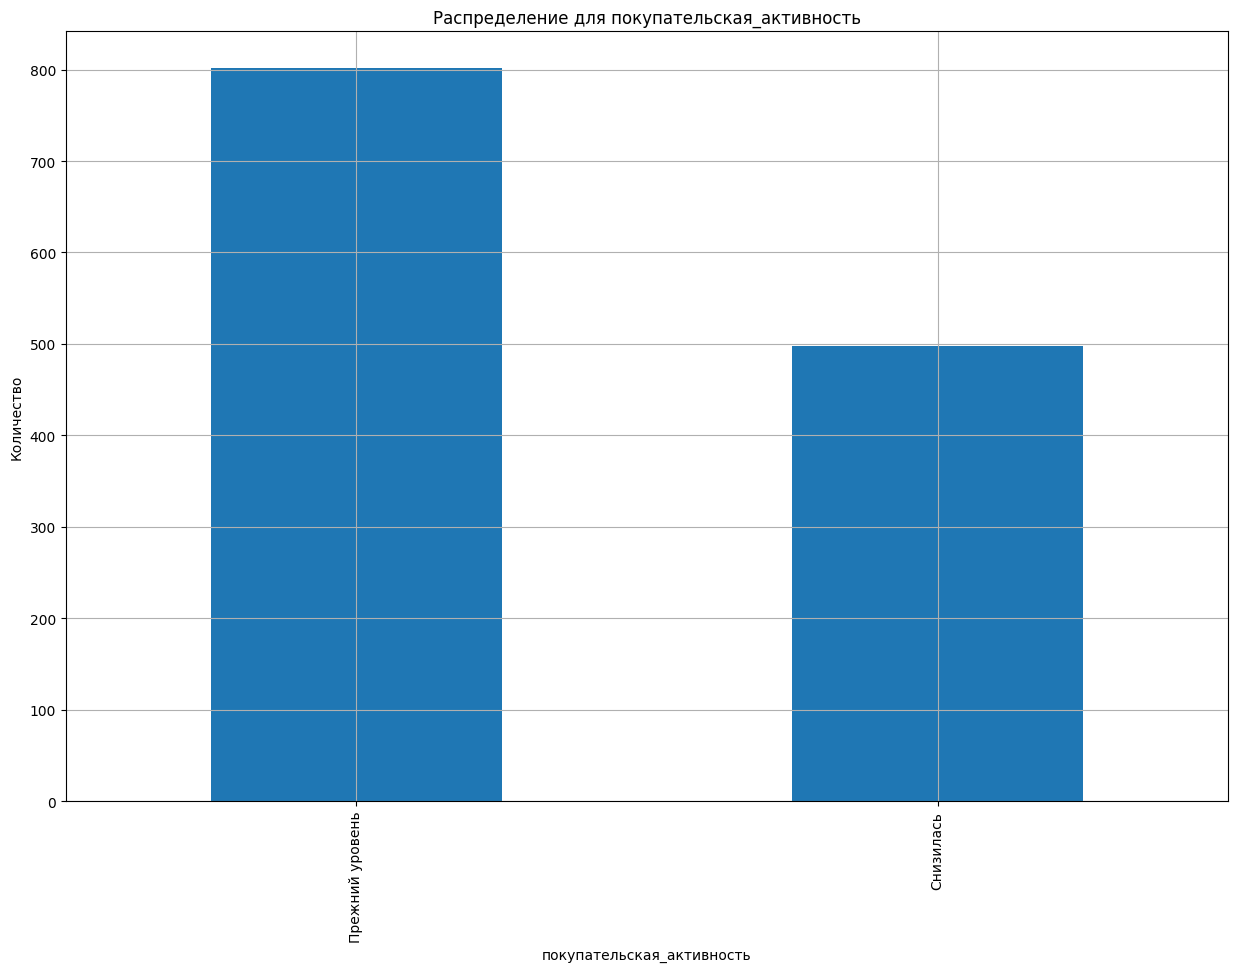

In [13]:
plot_n_describe(market_file['покупательская_активность'], 'bar')

Целевой признак, 2 значения, соотношение 40 к 60, проблем нет

count         1300
unique           3
top       стандарт
freq           914
Name: тип_сервиса, dtype: object

тип_сервиса
премиум      28.9
стандарт     70.3
стандартт     0.8
Name: count, dtype: float64

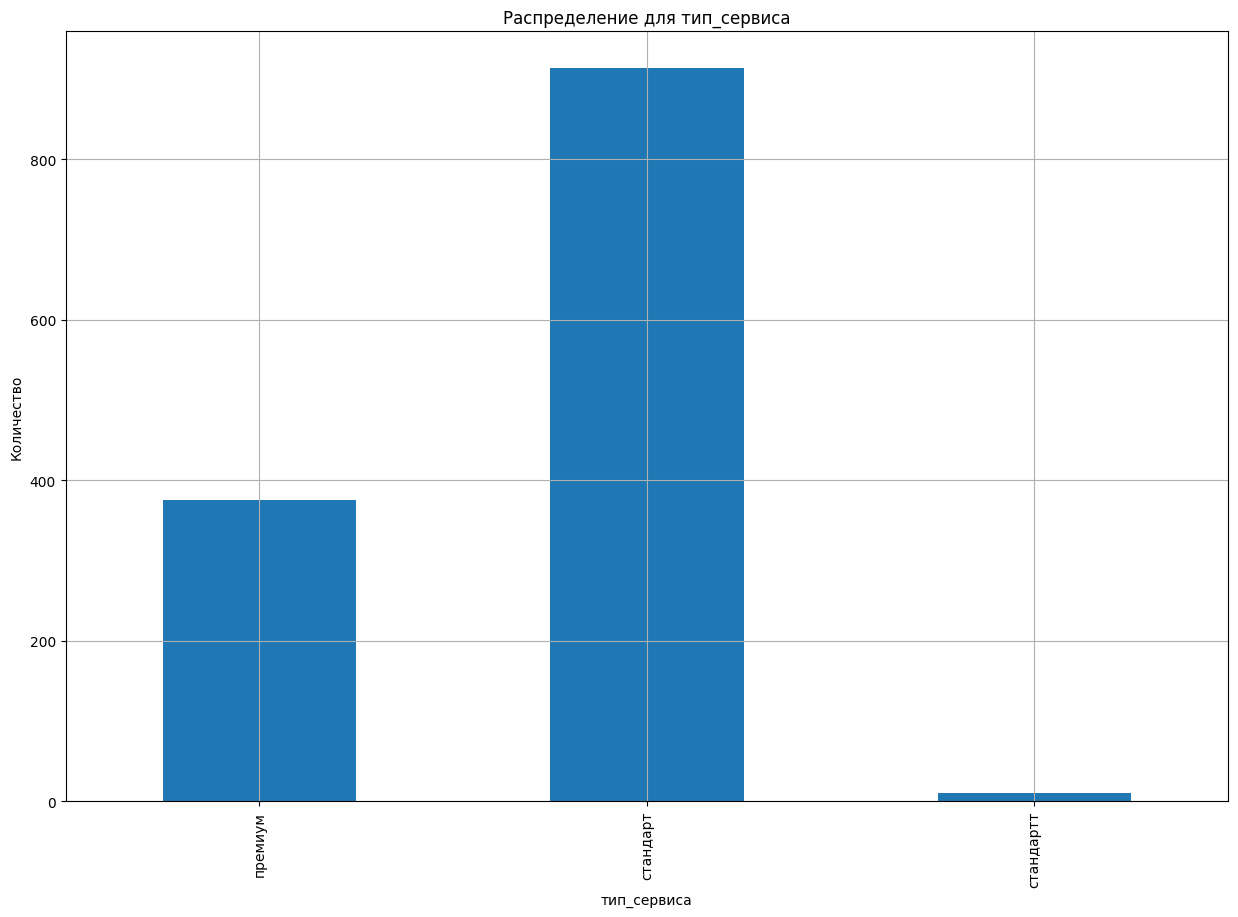

In [14]:
plot_n_describe(market_file['тип_сервиса'], 'bar')

2 значения + несколько проблемных ('стандартт'), починим

count         1300
unique           2
top       стандарт
freq           924
Name: тип_сервиса, dtype: object

тип_сервиса
премиум     28.9
стандарт    71.1
Name: count, dtype: float64

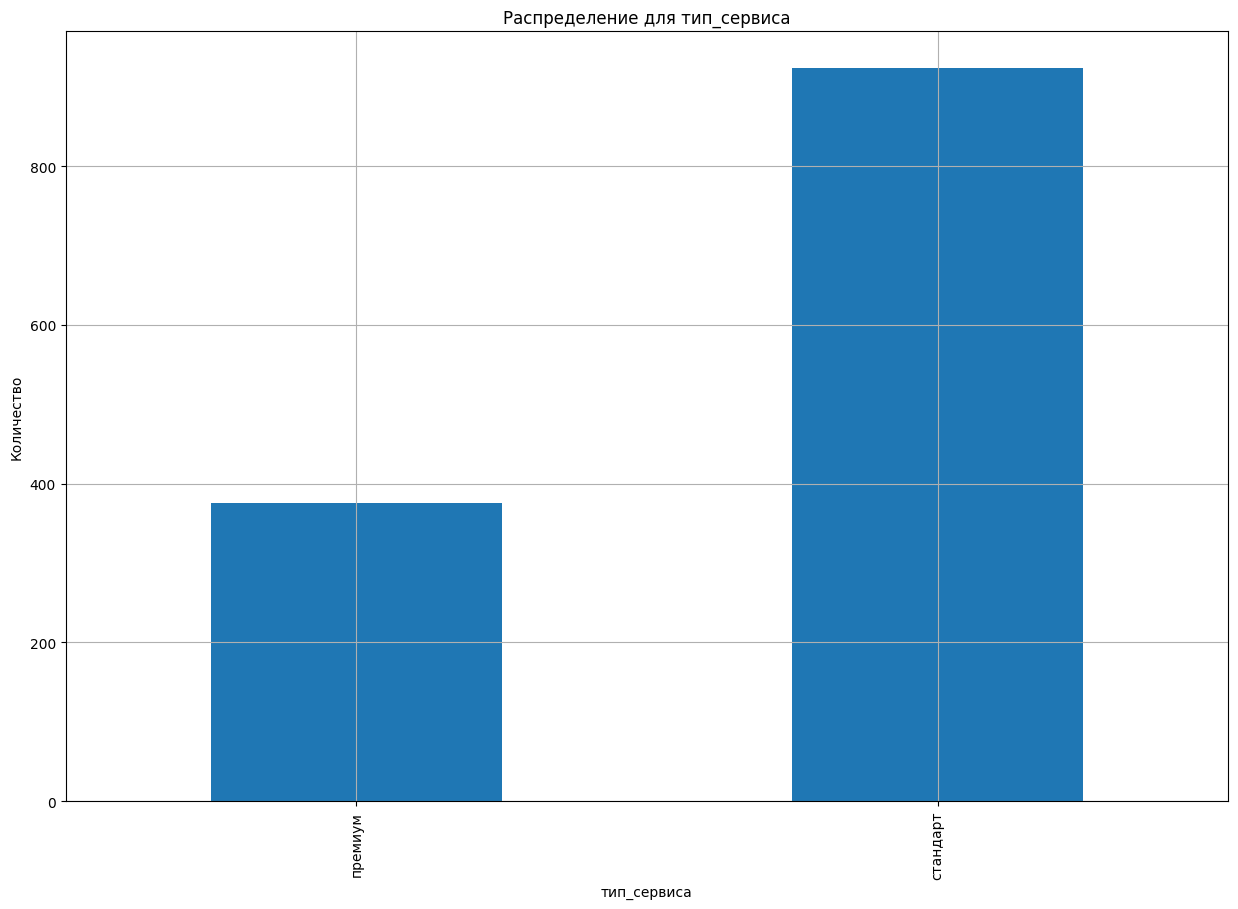

In [15]:
market_file['тип_сервиса'] = market_file['тип_сервиса'].str.replace('стандартт', 'стандарт')
plot_n_describe(market_file['тип_сервиса'], 'bar')

Теперь порядок

count     1300
unique       2
top         да
freq       962
Name: разрешить_сообщать, dtype: object

разрешить_сообщать
да     74.0
нет    26.0
Name: count, dtype: float64

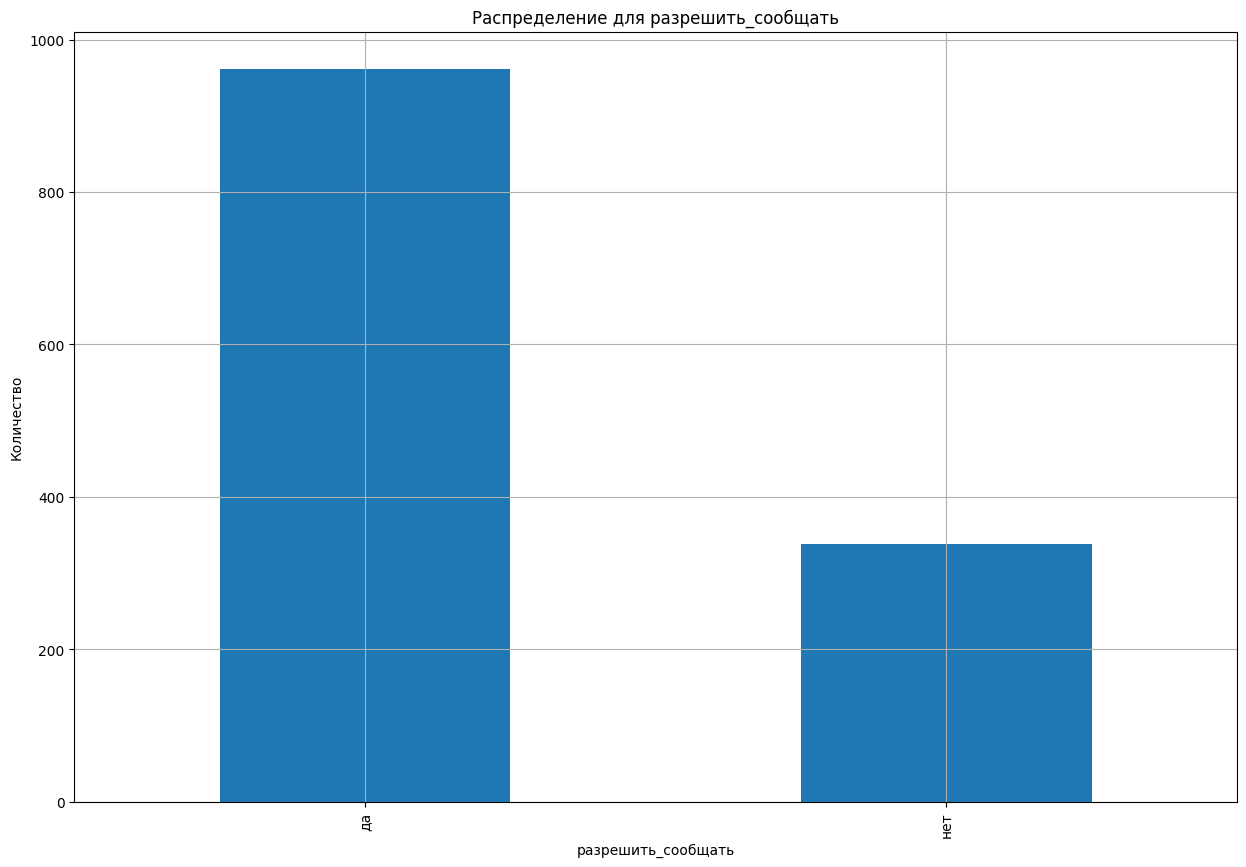

In [16]:
plot_n_describe(market_file['разрешить_сообщать'], 'bar')

Фактически булев признак, заменим сразу

count     1300
unique       2
top       True
freq       962
Name: разрешить_сообщать, dtype: object

разрешить_сообщать
False    26.0
True     74.0
Name: count, dtype: float64

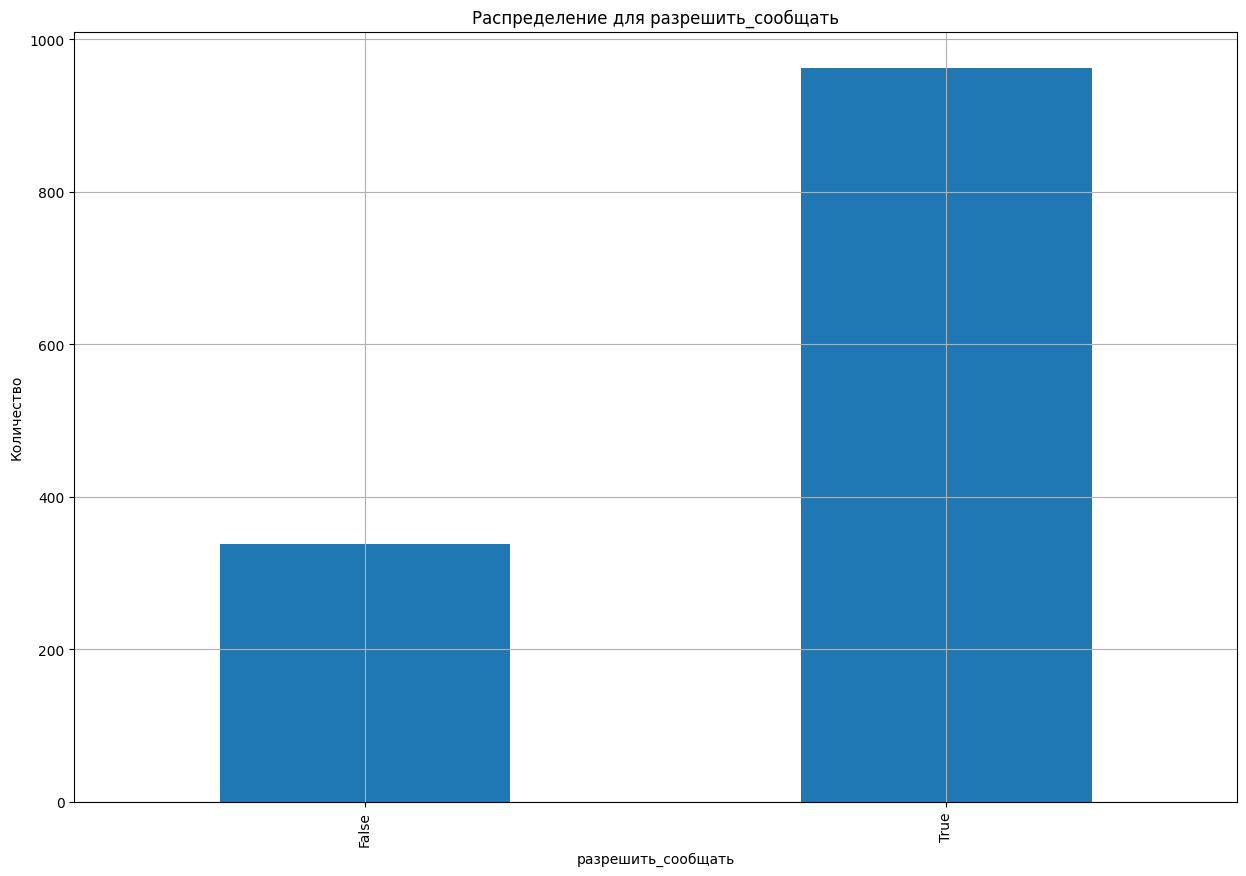

In [17]:
market_file['разрешить_сообщать'] = market_file['разрешить_сообщать'].apply(lambda x: x == 'да')
plot_n_describe(market_file['разрешить_сообщать'], 'bar')

Теперь порядок

count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: маркет_актив_6_мес, dtype: float64

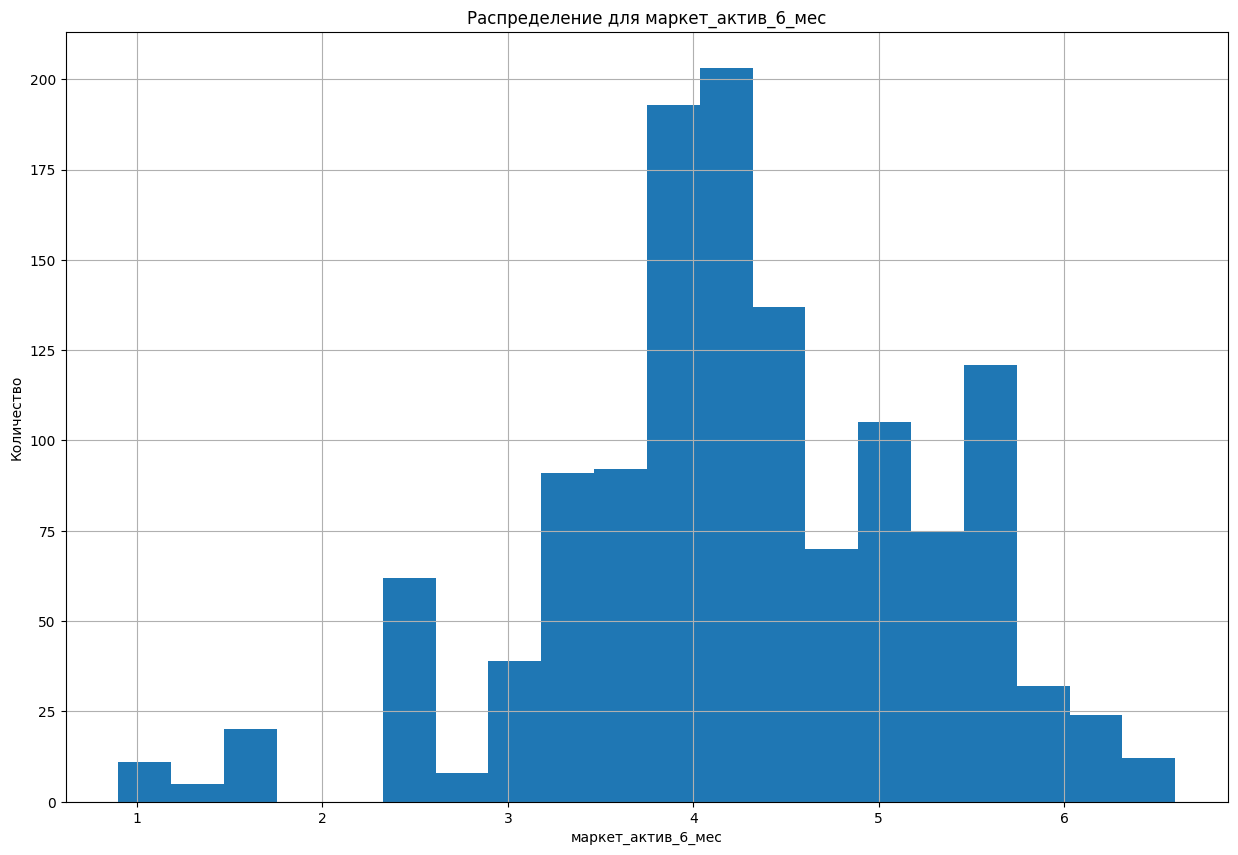

In [18]:
plot_n_describe(market_file['маркет_актив_6_мес'], 'hist')

Значения от 1 до 7, нецелые из-за усредения за полгода, проблем нет

count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: маркет_актив_тек_мес, dtype: float64

маркет_актив_тек_мес
3    23.7
4    51.5
5    24.8
Name: count, dtype: float64

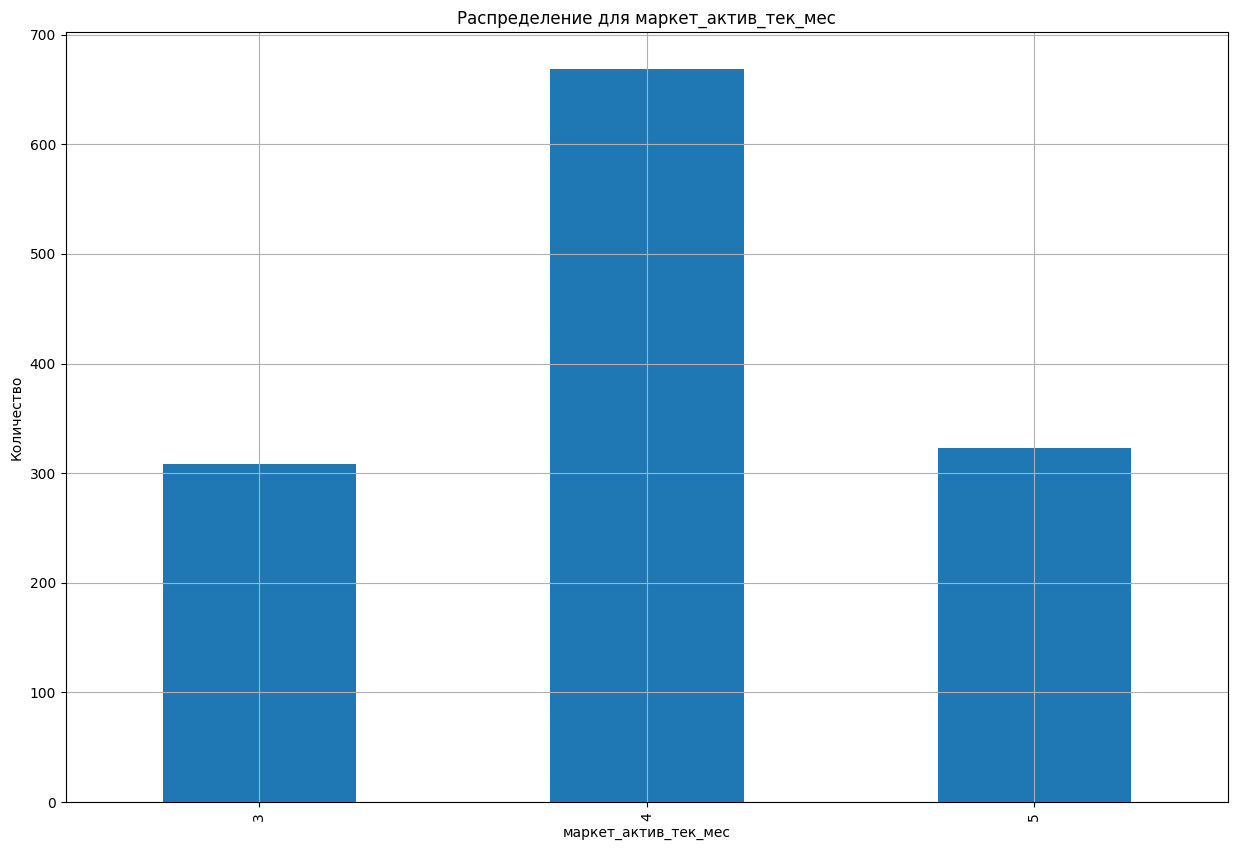

In [19]:
plot_n_describe(market_file['маркет_актив_тек_мес'], 'bar')

3, 4 или 5 за месяц, проблем нет

count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: длительность, dtype: float64

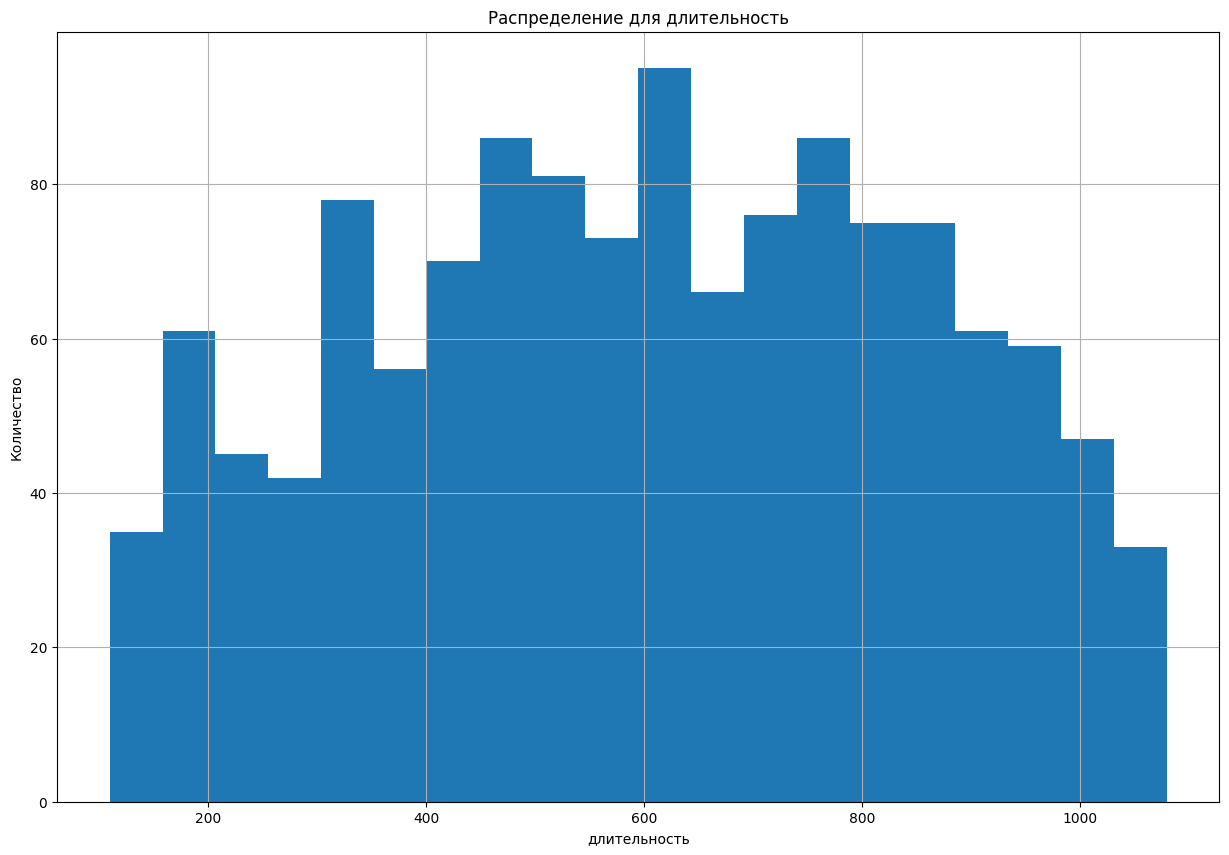

In [20]:
plot_n_describe(market_file['длительность'], 'hist')

Величины от 3 месяцев до 3 лет, проблем нет

count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64

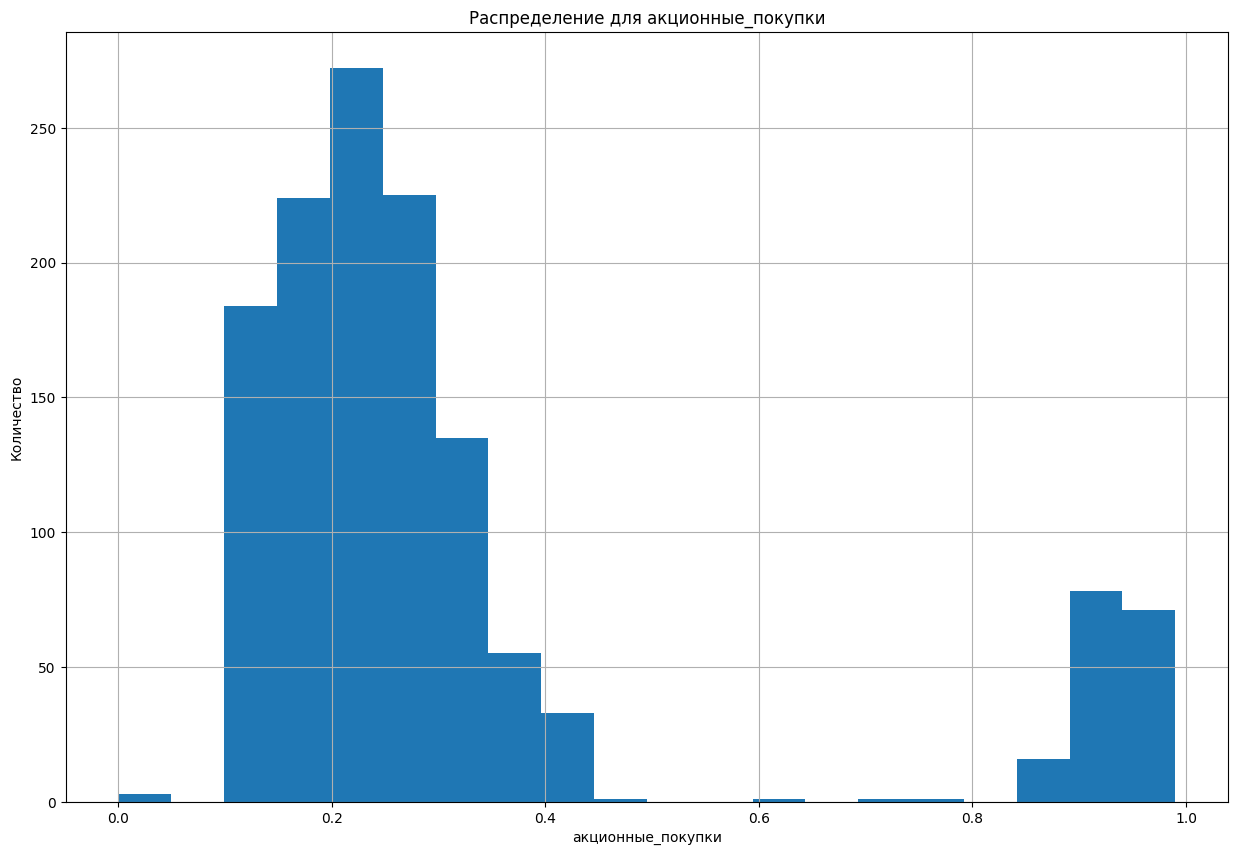

In [21]:
plot_n_describe(market_file['акционные_покупки'], 'hist')

Доля, от 0 до 99%, есть две группы, проблем нет

count                 1300
unique                   6
top       Товары для детей
freq                   330
Name: популярная_категория, dtype: object

популярная_категория
Домашний текстиль                       19.3
Косметика и аксесуары                   17.2
Кухонная посуда                         10.6
Мелкая бытовая техника и электроника    13.4
Техника для красоты и здоровья          14.2
Товары для детей                        25.4
Name: count, dtype: float64

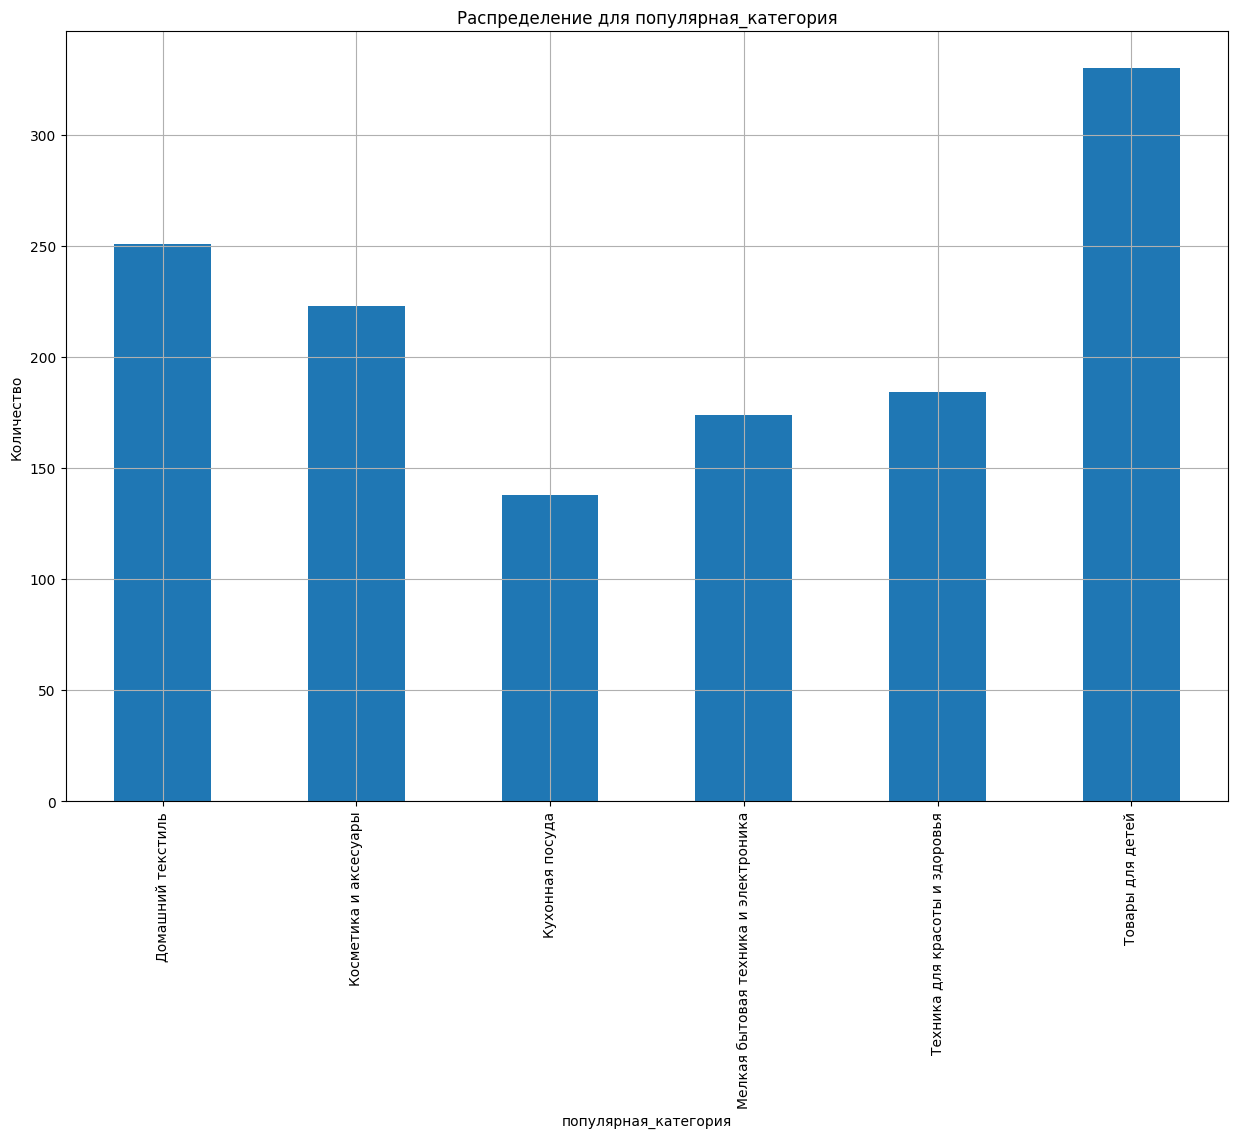

In [22]:
plot_n_describe(market_file['популярная_категория'], 'bar')

6 категорий, исправим название категории

count                 1300
unique                   6
top       Товары для детей
freq                   330
Name: популярная_категория, dtype: object

популярная_категория
Домашний текстиль                       19.3
Косметика и аксессуары                  17.2
Кухонная посуда                         10.6
Мелкая бытовая техника и электроника    13.4
Техника для красоты и здоровья          14.2
Товары для детей                        25.4
Name: count, dtype: float64

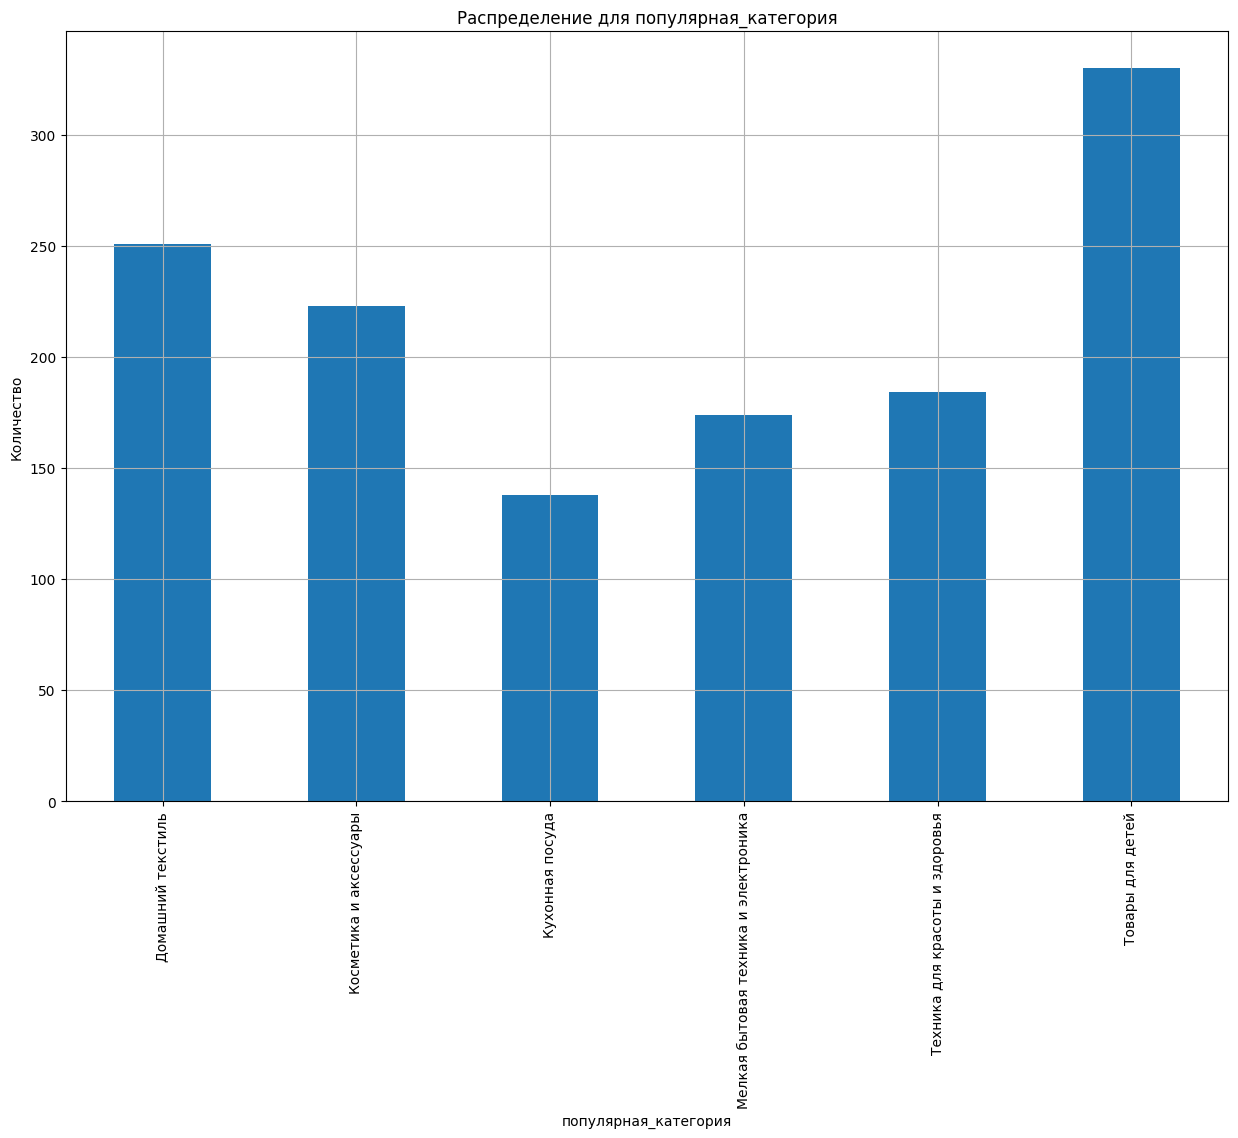

In [23]:
market_file['популярная_категория'] = market_file['популярная_категория'].str.replace('Косметика и аксесуары', 'Косметика и аксессуары')
plot_n_describe(market_file['популярная_категория'], 'bar')

count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: средний_просмотр_категорий_за_визит, dtype: float64

средний_просмотр_категорий_за_визит
1     8.2
2    24.0
3    27.4
4    20.2
5    13.6
6     6.6
Name: count, dtype: float64

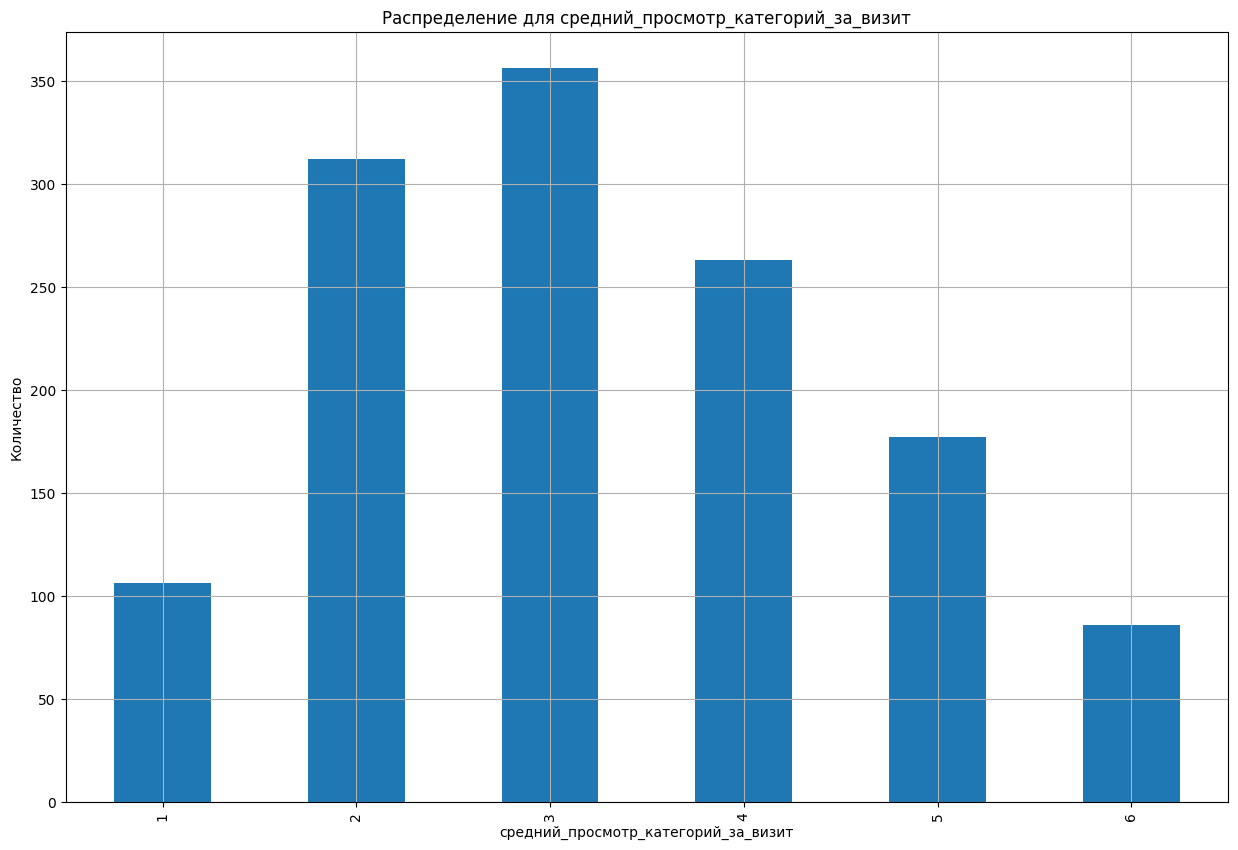

In [24]:
plot_n_describe(market_file['средний_просмотр_категорий_за_визит'], 'bar')

Знаения от 1 до 6, проблем нет

count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: неоплаченные_продукты_штук_квартал, dtype: float64

неоплаченные_продукты_штук_квартал
0      8.9
1     20.1
2     20.1
3     16.8
4     15.2
5     10.4
6      3.4
7      2.6
8      1.5
9      0.8
10     0.3
Name: count, dtype: float64

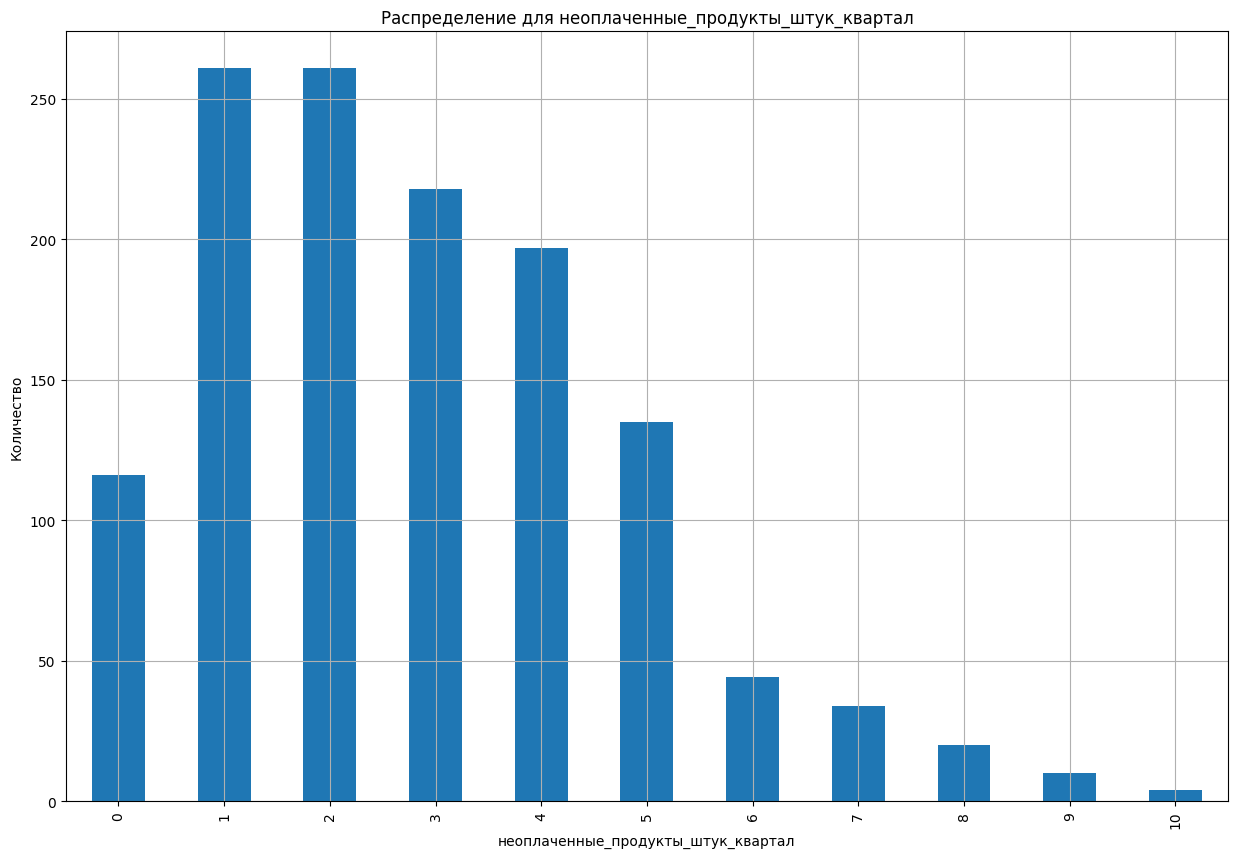

In [25]:
plot_n_describe(market_file['неоплаченные_продукты_штук_квартал'], 'bar')

Значения от 0 до 10, проблем нет

count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: ошибка_сервиса, dtype: float64

ошибка_сервиса
0     1.3
1     5.7
2    14.5
3    17.4
4    19.8
5    16.0
6    12.0
7     7.1
8     5.1
9     1.2
Name: count, dtype: float64

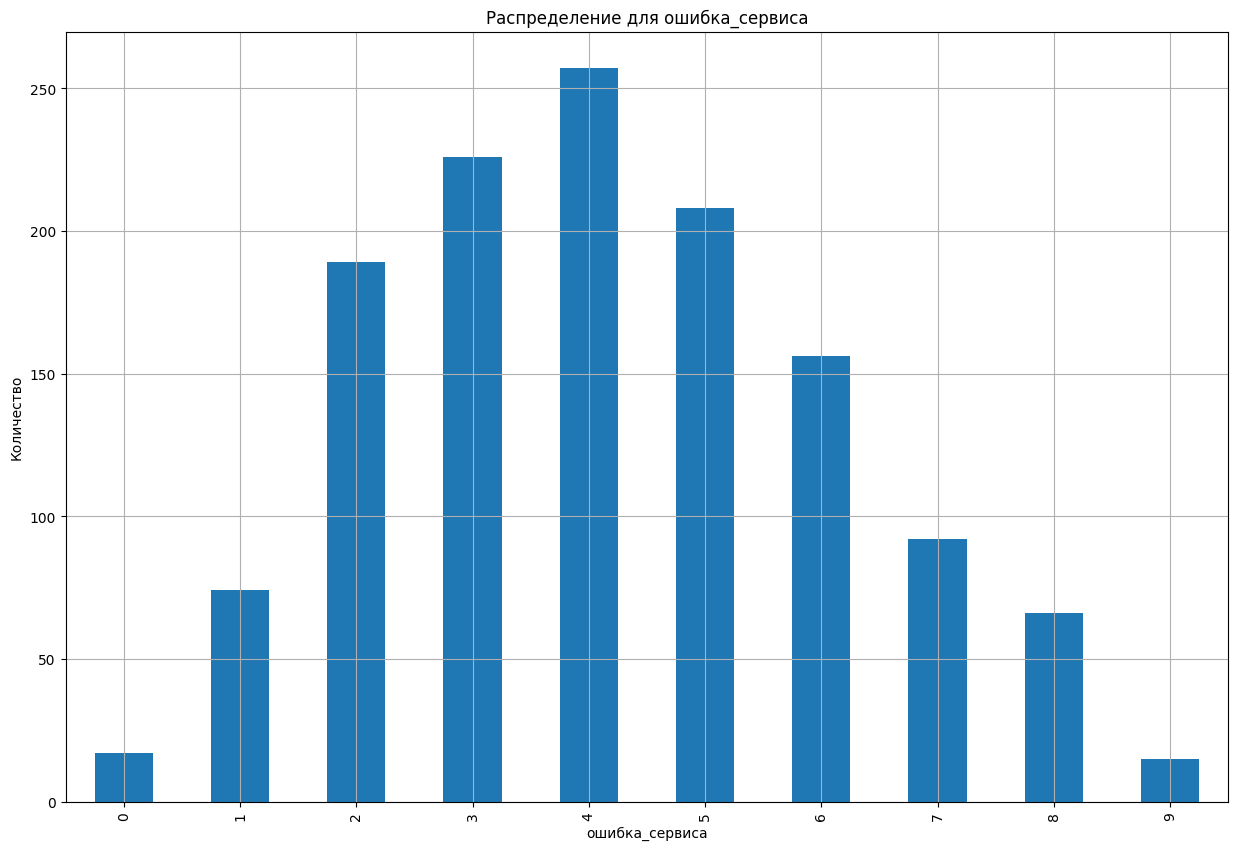

In [26]:
plot_n_describe(market_file['ошибка_сервиса'], 'bar')

Значения от 0 до 9, проблем нет

count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: страниц_за_визит, dtype: float64

страниц_за_визит
1     1.5
2     4.5
3     5.8
4     8.6
5     8.8
6     9.8
7     7.8
8     8.4
9     8.3
10    8.0
11    7.1
12    5.6
13    4.7
14    4.1
15    2.8
16    1.6
17    1.5
18    0.5
19    0.4
20    0.2
Name: count, dtype: float64

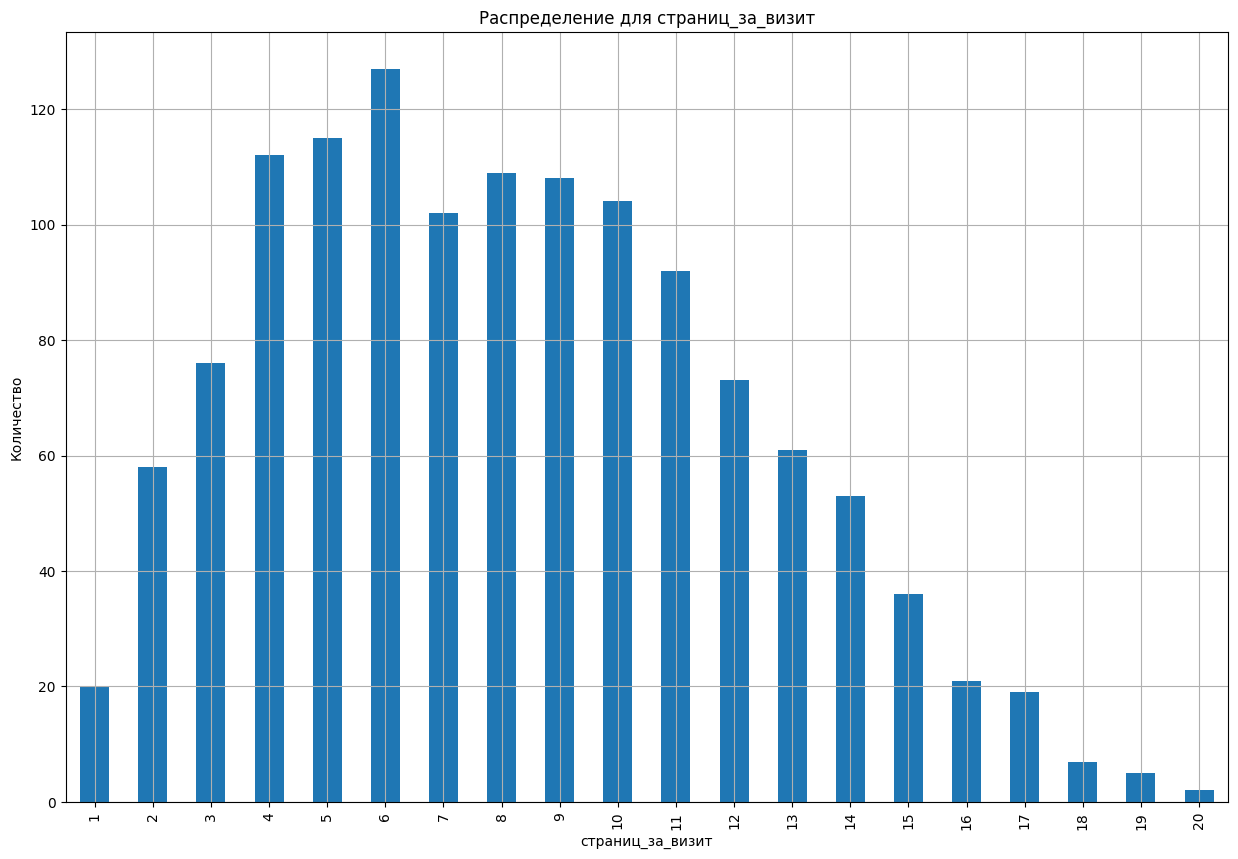

In [27]:
plot_n_describe(market_file['страниц_за_визит'], 'bar')

Значения от 1 до 20, проблем нет

### market_money

In [28]:
market_money.columns

Index(['id', 'период', 'выручка'], dtype='object', name='market_money')

count                    3900
unique                      3
top       препредыдущий_месяц
freq                     1300
Name: период, dtype: object

период
предыдущий_месяц       33.3
препредыдущий_месяц    33.3
текущий_месяц          33.3
Name: count, dtype: float64

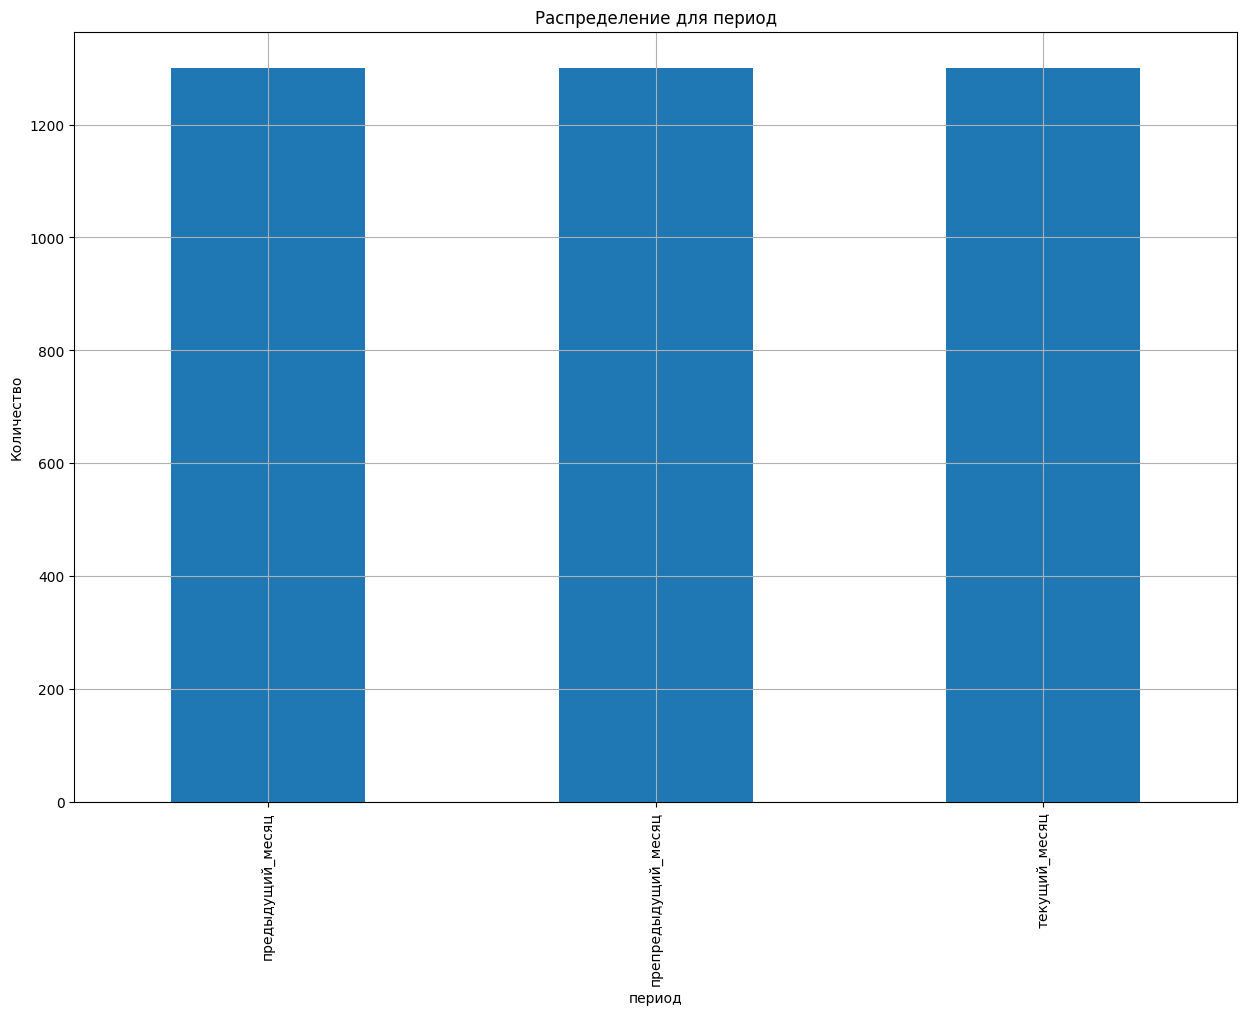

In [29]:
plot_n_describe(market_money['период'], 'bar')

Данные за 3 месяца, проблем нет

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: выручка, dtype: float64

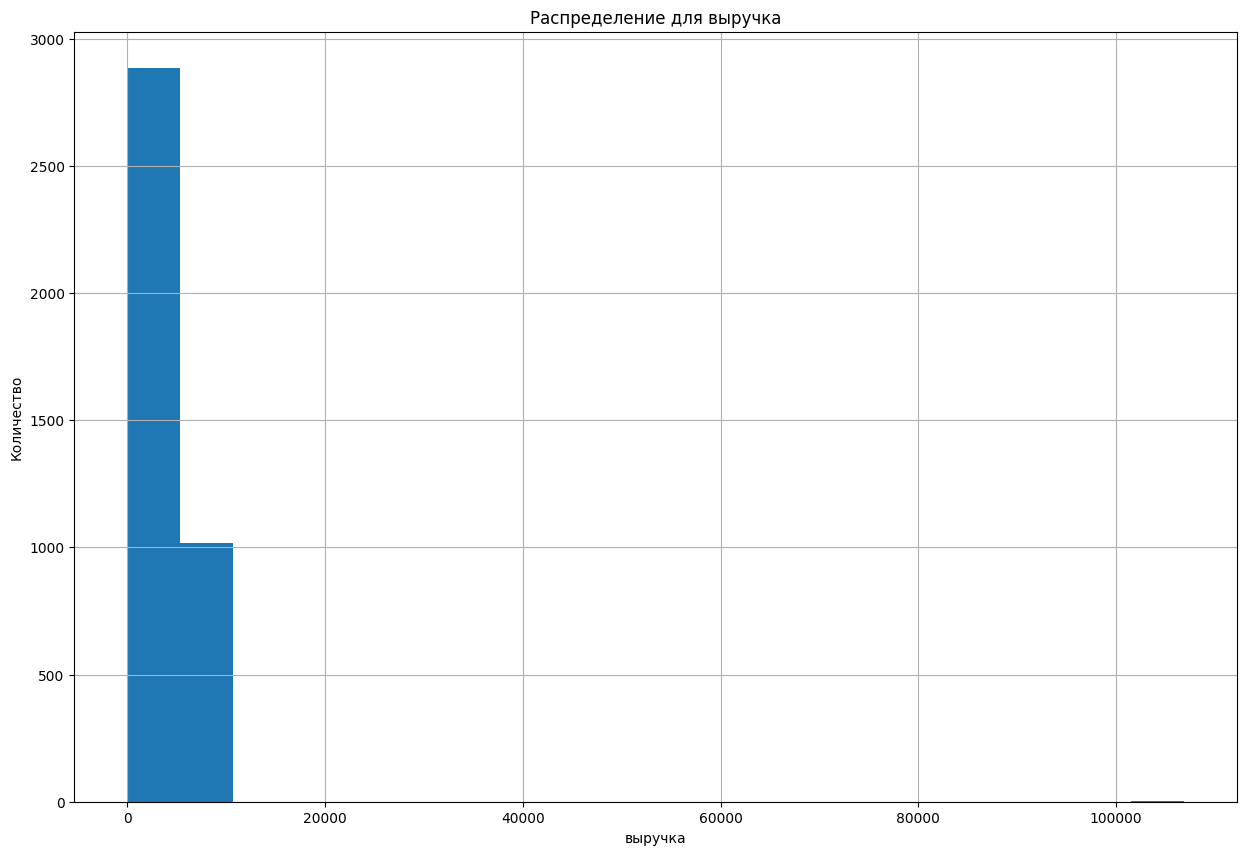

In [30]:
plot_n_describe(market_money['выручка'], 'hist')

Есть явный выброс (106862.2), посмотрим детально с помощью "ящика"

In [31]:
market_money[market_money['выручка'] > 10000]

market_money,id,период,выручка
98,215380,текущий_месяц,106862.2


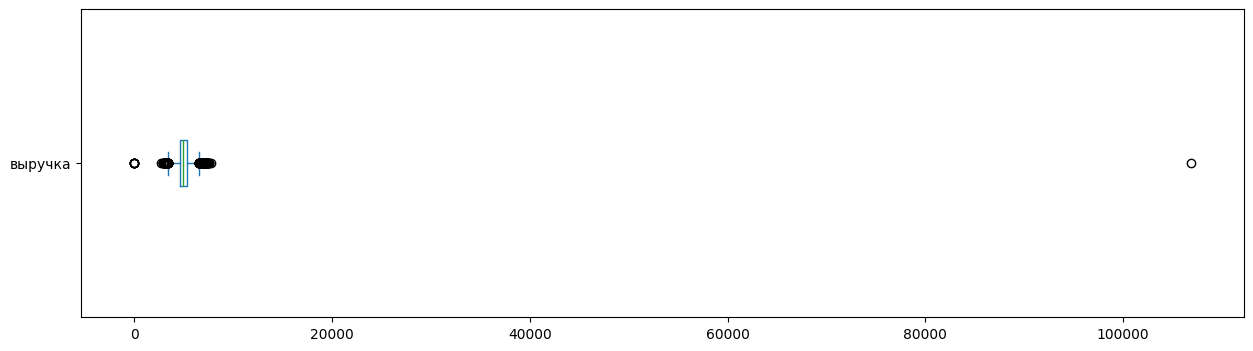

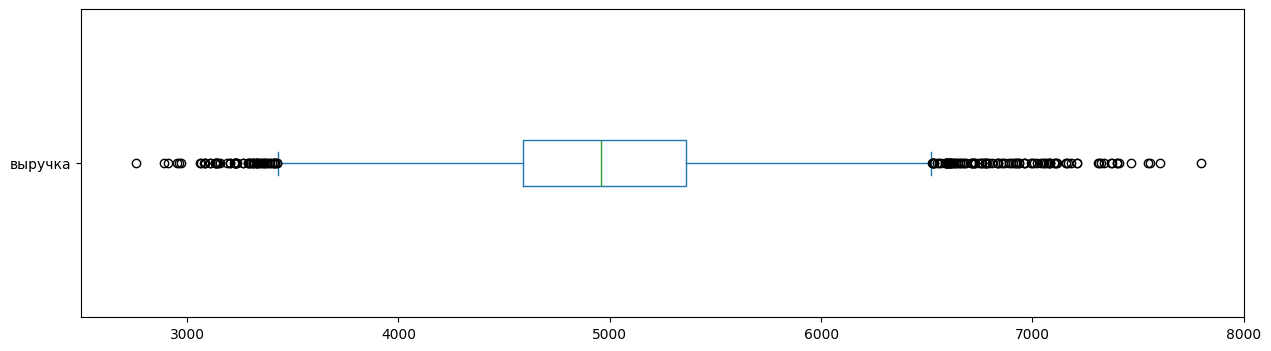

In [32]:
for xlim in (None, None), (2500, 8000):

    market_money['выручка'].plot(kind='box', figsize=(15, 4), vert=False)

    plt.xlim(*xlim)

    plt.show()

Только от одного клиента в одном месяце выручка дольше 10к, типовое значение 5к. Возможно, лучше удалить выброс, чтобы не пострадали линейные модели

### market_time

In [33]:
market_time.columns

Index(['id', 'период', 'минут'], dtype='object', name='market_time')

count              2600
unique                2
top       текущий_месяц
freq               1300
Name: период, dtype: object

период
предыдцщий_месяц    50.0
текущий_месяц       50.0
Name: count, dtype: float64

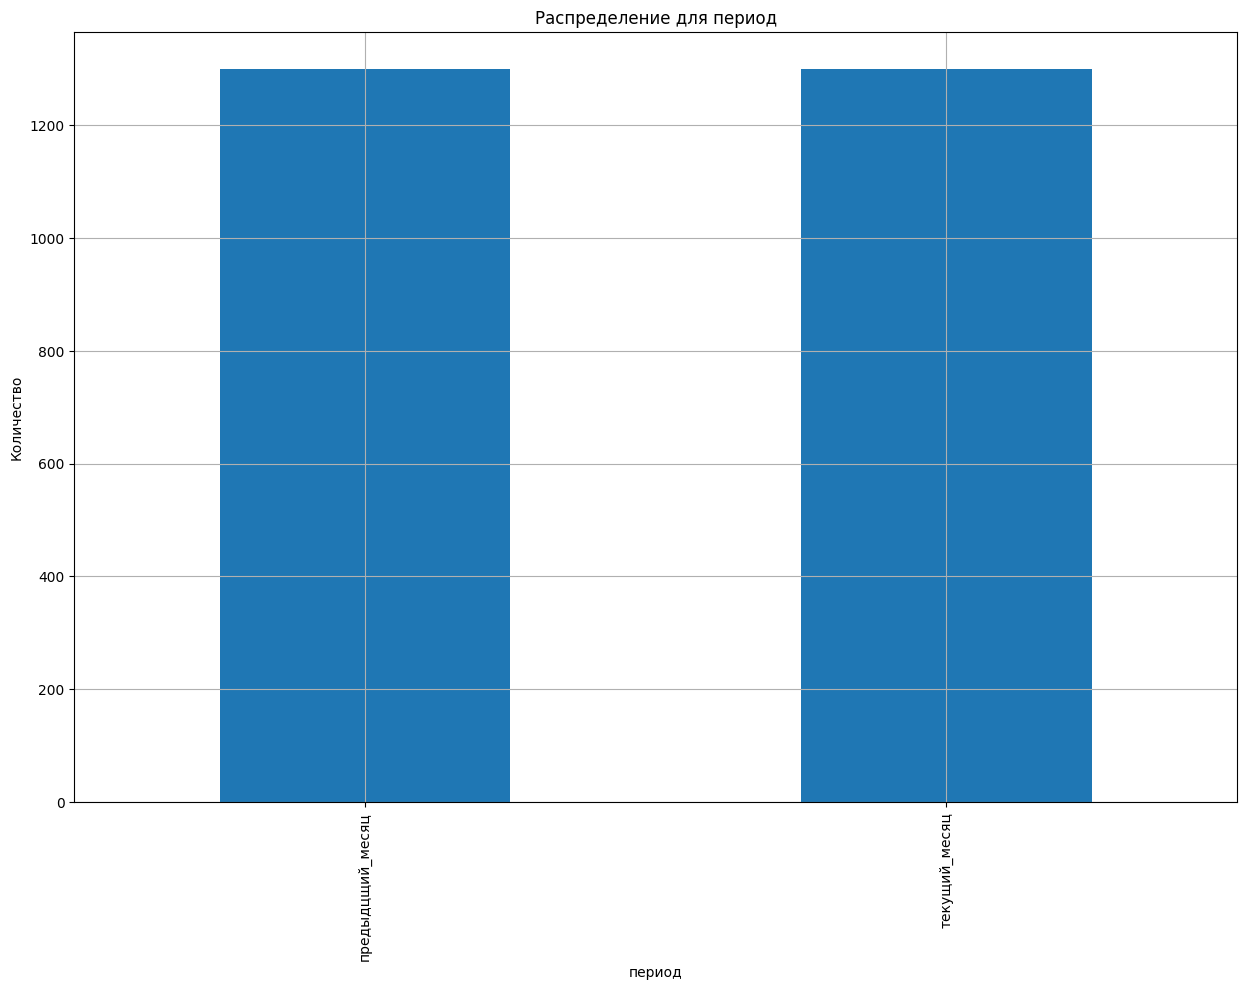

In [34]:
plot_n_describe(market_time['период'], 'bar')

Данные за 2 месяца, опечатка, исправим

count              2600
unique                2
top       текущий_месяц
freq               1300
Name: период, dtype: object

период
предыдущий_месяц    50.0
текущий_месяц       50.0
Name: count, dtype: float64

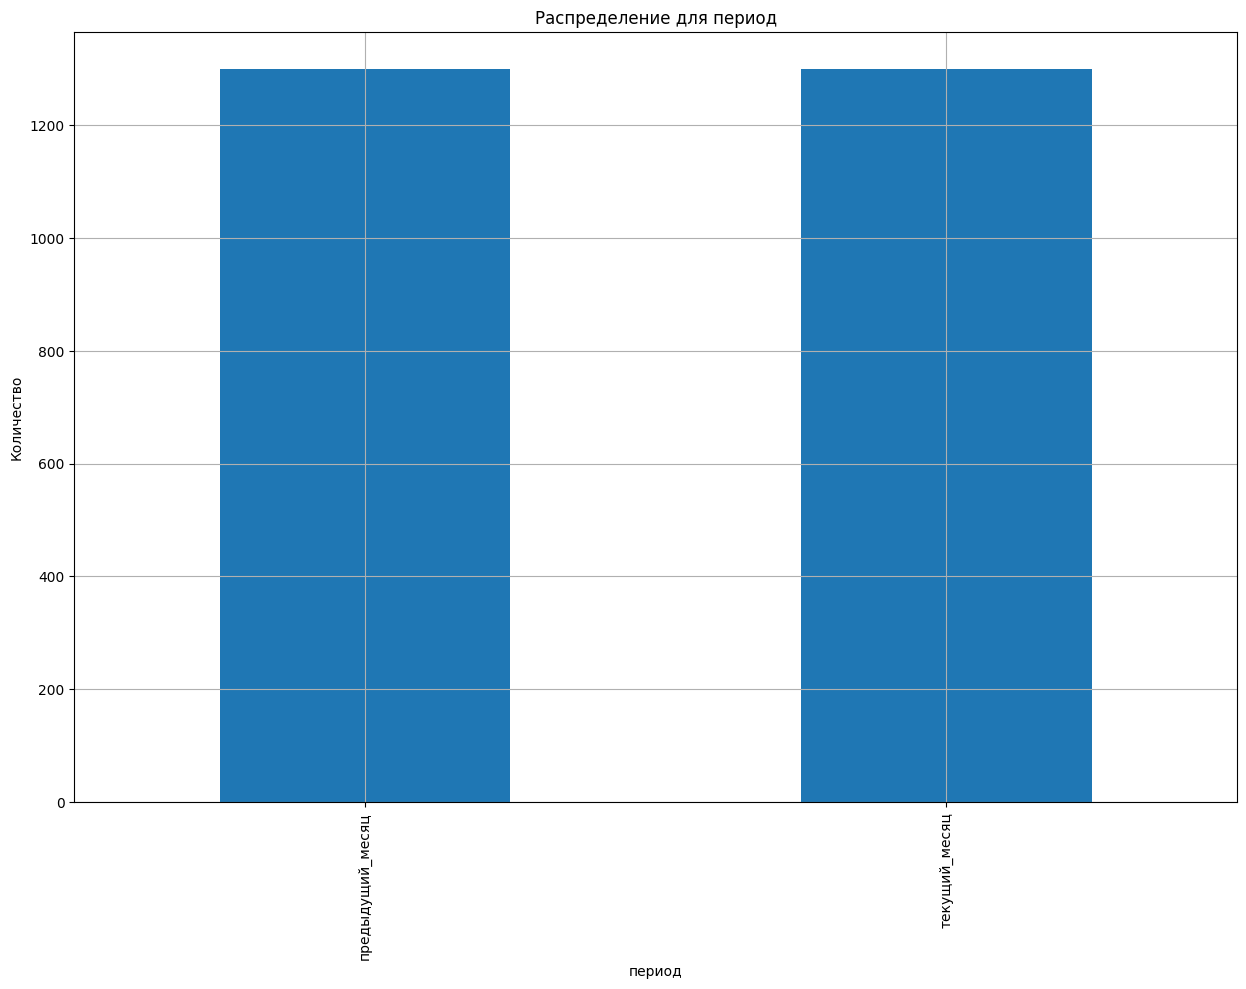

In [35]:
market_time['период'] = market_time['период'].str.replace('предыдцщий_месяц', 'предыдущий_месяц')
plot_n_describe(market_time['период'], 'bar')

count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64

минут
4     0.3
5     0.8
6     2.3
7     3.4
8     5.4
9     7.2
10    7.8
11    8.5
12    9.1
13    7.9
14    9.8
15    6.7
16    6.2
17    6.3
18    5.6
19    4.6
20    3.9
21    2.0
22    1.5
23    0.5
Name: count, dtype: float64

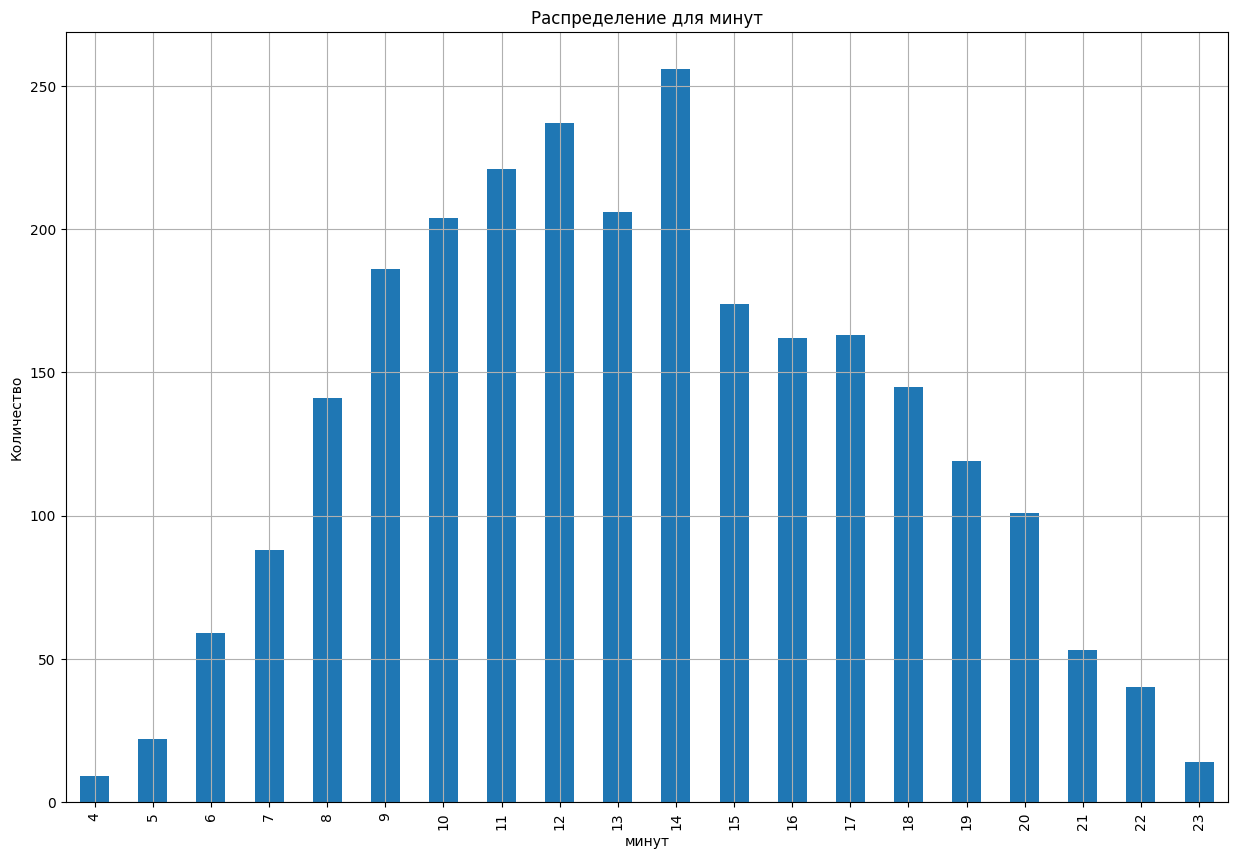

In [36]:
plot_n_describe(market_time['минут'], 'bar')

Значения от 4 до 23, проблем нет

### money

In [37]:
money.columns

Index(['id', 'прибыль'], dtype='object', name='money')

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64

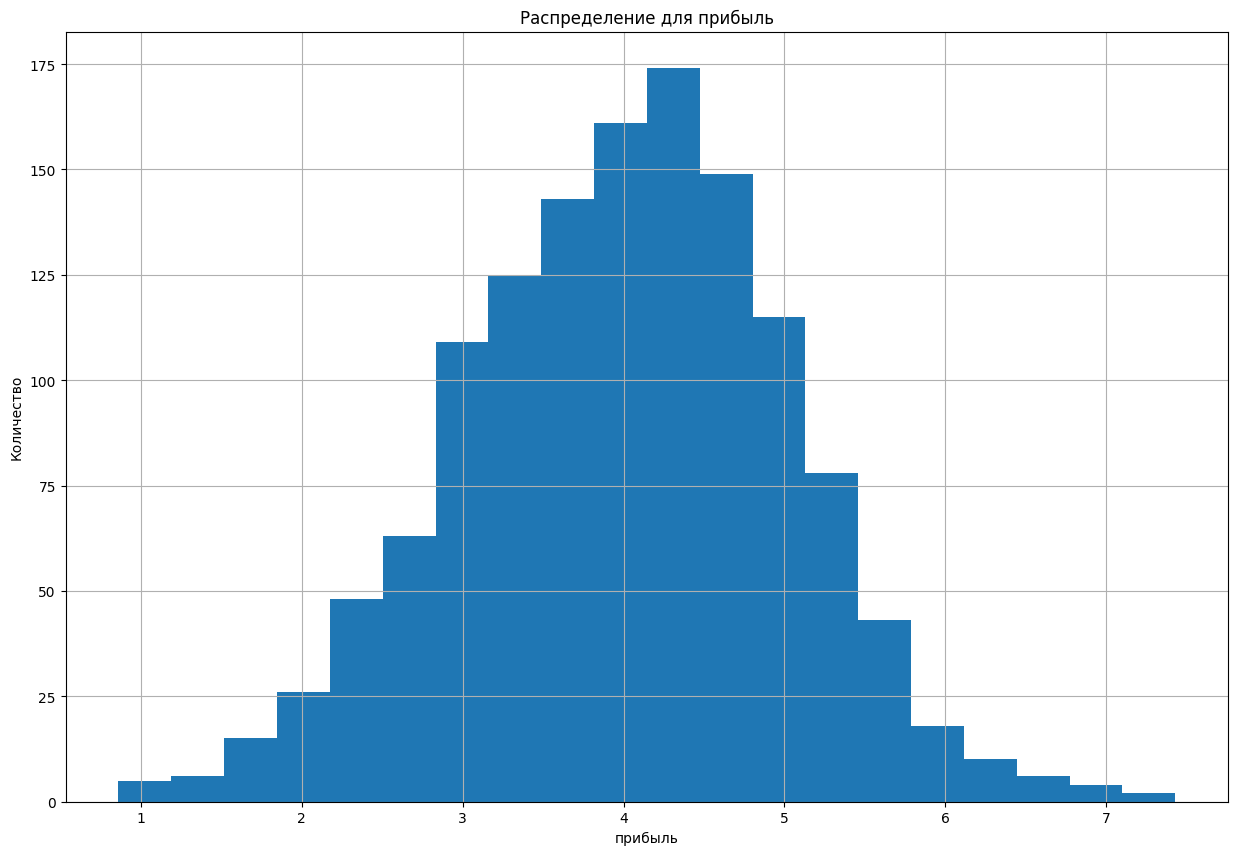

In [38]:
plot_n_describe(money['прибыль'], 'hist')

Значения от 1 до 7, единицы не ясны (тысячи?)

### Активность за 3 месяца

In [39]:
# ненулевая выручка за любой из 3 периодов, только id
active = market_money.query('выручка > 0')[['id']]

# удалим дубликаты id
active = active.drop_duplicates()

active.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 1 to 3897
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      1300 non-null   int64
dtypes: int64(1)
memory usage: 20.3 KB


Похоже, среди данных нет клиентов, которые за 3 месяца ничего не покупали.

### Итог
Только одна аномалия (выручка в market_money) и немного опечаток

## Объединение таблиц

In [40]:
market_full = market_file.copy()

### market_money

In [41]:
shape_before = market_full.shape

for month in market_money['период'].unique():
    market_full = market_full.merge(
        market_money.loc[market_money['период'] == month, ['id', 'выручка']],
        on='id'
    )
    
    market_full = market_full.rename(columns={'выручка': f'выручка_{month}'})

display(market_full.info())
display(market_full.head())

shape_after = market_full.shape

print('До -> После:', shape_before, '->', shape_after)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   bool   
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

None

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препредыдущий_месяц,выручка_текущий_месяц,выручка_предыдущий_месяц
0,215348,Снизилась,премиум,True,3.4,5,121,0.00,Товары для детей,6,2,1,5,0.0,3293.1,0.0
1,215349,Снизилась,премиум,True,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,4971.6,5216.0
2,215350,Снизилась,стандарт,False,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5058.4,5457.5
3,215351,Снизилась,стандарт,True,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6610.4,6158.0
4,215352,Снизилась,стандарт,False,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5872.5,5807.5


До -> После: (1300, 13) -> (1300, 16)


### market_time

In [42]:
shape_before = market_full.shape

for month in market_time['период'].unique():
    market_full = market_full.merge(
        market_time.loc[market_time['период'] == month, ['id', 'минут']],
        on='id'
    )
    
    market_full = market_full.rename(columns={'минут': f'минут_{month}'})

display(market_full.info())
display(market_full.head())

shape_after = market_full.shape

print('До -> После:', shape_before, '->', shape_after)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   bool   
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

None

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препредыдущий_месяц,выручка_текущий_месяц,выручка_предыдущий_месяц,минут_текущий_месяц,минут_предыдущий_месяц
0,215348,Снизилась,премиум,True,3.4,5,121,0.00,Товары для детей,6,2,1,5,0.0,3293.1,0.0,14,13
1,215349,Снизилась,премиум,True,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,4971.6,5216.0,10,12
2,215350,Снизилась,стандарт,False,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5058.4,5457.5,13,8
3,215351,Снизилась,стандарт,True,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6610.4,6158.0,13,11
4,215352,Снизилась,стандарт,False,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5872.5,5807.5,11,8


До -> После: (1300, 16) -> (1300, 18)


### Итог
Объединение прошло успешно, данные за разные периоды собраны в отдельные колонки

## Корреляционный анализ

In [43]:
pd.DataFrame(
    market_full.dtypes, 
    columns=['dtypes']
).join(
    pd.DataFrame(
        market_full.nunique(),
        columns=['count']
    )
)

,dtypes,count
id,int64,1300
покупательская_активность,object,2
тип_сервиса,object,2
разрешить_сообщать,bool,2
маркет_актив_6_мес,float64,41
маркет_актив_тек_мес,int64,3
длительность,int64,658
акционные_покупки,float64,42
популярная_категория,object,6
средний_просмотр_категорий_за_визит,int64,6


Выберем колонки, которые будут рассматриваться числовыми

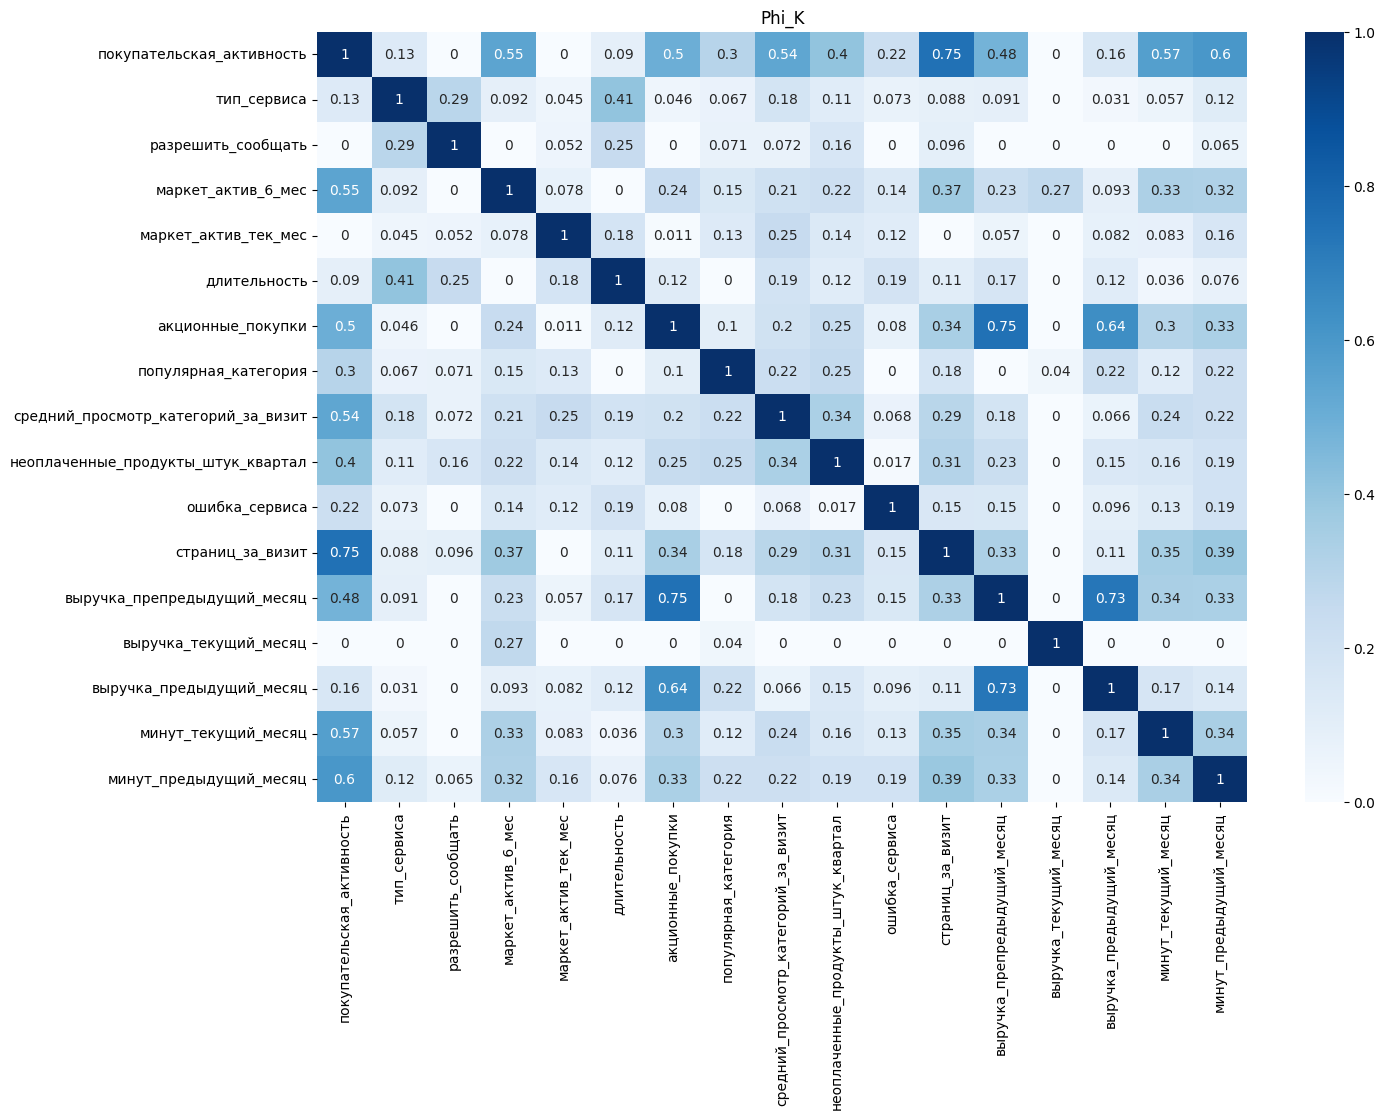

In [44]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    market_full.drop('id', axis=1).phik_matrix(
        interval_cols=[
            'маркет_актив_6_мес',
            'длительность',
            'акционные_покупки',
            'выручка_препредыдущий_месяц',
            'выручка_текущий_месяц', 
            'выручка_предыдущий_месяц',
        ]
    ), 
    annot=True, 
    cmap='Blues'
)
plt.title('Phi_K')
plt.show()

### Итог
При расчёт с помощью Phi_K стала видна очень высокая корреляция:
- 'выручка_предыдущий_месяц' - 'выручка_препредыдущий_месяц'
- 'минут_текущий_месяц' - 'минут_предыдущий_месяц'
- 'выручка_препредыдущий_месяц' - 'акционные_покупки'
    
Первые 2 пары довольно логичны - одинаковая характеристика за соседние периоды. Веротяно, можно сделать новый признак. Например, отношение 'выручка_предыдущий_месяц' к 'выручка_препредыдущий_месяц'. Последняя связь не выглядит особо критично, но довольна логична - акции стимулировали к покупкам.

## Использование пайплайнов

### Подготовка данных

In [45]:
# признаки
X = market_full.drop(
    ['id', 'покупательская_активность'], 
    axis=1
)

# целевая, класс 1 - покупательская активность снизилась

le = LabelEncoder()
y = le.fit_transform(market_full['покупательская_активность'])

# инверсия при необходимости
if le.classes_[0] == 'Снизилась':
    y = 1 - y

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE,
    stratify=y #на всякий случай, ибо данных не очень много
)

In [47]:
print('X:', X.shape, '->', X_train.shape, '+', X_test.shape)
print('y:', y.shape, '->', y_train.shape, '+', y_test.shape)

X: (1300, 16) -> (975, 16) + (325, 16)
y: (1300,) -> (975,) + (325,)


### Пайплайн

In [48]:
ohe_columns = [
    'популярная_категория'
]

ord_columns = [
    'тип_сервиса'
]

num_columns = [
    'маркет_актив_6_мес',
    'маркет_актив_тек_мес', 
    'длительность', 
    'акционные_покупки', 
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал', 
    'ошибка_сервиса',
    'страниц_за_визит', 
    'выручка_препредыдущий_месяц',
    'выручка_текущий_месяц', 
    'выручка_предыдущий_месяц',
    'минут_текущий_месяц', 
    'минут_предыдущий_месяц'
]

In [49]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', OneHotEncoder(
            drop='first',
            sparse_output=False,
            handle_unknown='ignore'
        ), ohe_columns),
        
        ('ord', OrdinalEncoder(
            categories=[['стандарт', 'премиум']],
            handle_unknown='use_encoded_value',
            unknown_value=-1
        ), ord_columns),
        
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough',
    force_int_remainder_cols=False
)

In [50]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', KNeighborsClassifier())
    ]
)

In [51]:
preprocessor_grid = {    
    'preprocessor__num': [
        StandardScaler(), 
        MinMaxScaler()
    ]
}

In [52]:
param_grid = [
    
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': [3, 5, 7]    # варьируем количество соседей
    } | preprocessor_grid,
    
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5) # варьируем максимальную глубину дерева
    } | preprocessor_grid,

    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'models__C': range(1, 4) # варьируем силу l2 регуляризации
    } | preprocessor_grid,
    
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__kernel': ['linear', 'poly', 'rbf'] # варьируем тип ядра
    } | preprocessor_grid
]

### Поиск лучшей модели, скалера и кодировщика

In [53]:
grid = GridSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc', # работает для всех модей, не зависит от порога классификации для логрега
    n_jobs=-1
)

In [54]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['популярная_категория']),
                                                                        ('ord',
                                                                         OrdinalEncoder(categories=[['стандарт',
                                                                                                     'премиум']],
                                                                                        handle_unknown='use_encoded_value',
                                                                                        unkno...
                          'models__max_depth': range(2, 5),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler()]},
                         {'models': [LogisticRegression(random_state=42)],
                          'models__C': range(1, 4),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler()]},
                         {'models': [SVC(probability=True, random_state=42)],
                          'models__kernel': ['linear', 'poly', 'rbf'],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler()]}],
             scoring='roc_auc')

In [55]:
pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_models,param_models__n_neighbors,param_preprocessor__num,param_models__max_depth,param_models__C,param_models__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
22,0.066614,0.005335,0.007989,0.001145,"SVC(probability=True, random_state=42)",NaN,StandardScaler(),NaN,NaN,rbf,"{'models': SVC(probability=True, random_state=...",0.940333,0.899778,0.908444,0.933889,0.926960,0.921881,0.015359,1
23,0.067708,0.005804,0.007406,0.000886,"SVC(probability=True, random_state=42)",NaN,MinMaxScaler(),NaN,NaN,rbf,"{'models': SVC(probability=True, random_state=...",0.921667,0.897000,0.893444,0.922111,0.913447,0.909534,0.012138,2
21,0.064442,0.002392,0.007488,0.000514,"SVC(probability=True, random_state=42)",NaN,MinMaxScaler(),NaN,NaN,poly,"{'models': SVC(probability=True, random_state=...",0.907111,0.894333,0.896556,0.920889,0.915904,0.906958,0.010409,3
13,0.010695,0.001550,0.006671,0.000160,LogisticRegression(random_state=42),NaN,MinMaxScaler(),NaN,1.0,NaN,{'models': LogisticRegression(random_state=42)...,0.918333,0.887667,0.889333,0.911556,0.907416,0.902861,0.012244,4
15,0.012297,0.000627,0.006562,0.000466,LogisticRegression(random_state=42),NaN,MinMaxScaler(),NaN,2.0,NaN,{'models': LogisticRegression(random_state=42)...,0.917667,0.885889,0.887667,0.912444,0.906187,0.901971,0.012939,5
4,0.008226,0.000679,0.006598,0.001159,KNeighborsClassifier(),7.0,StandardScaler(),NaN,NaN,NaN,"{'models': KNeighborsClassifier(), 'models__n_...",0.911167,0.858944,0.895500,0.920833,0.922381,0.901765,0.023452,6
17,0.012638,0.000634,0.006555,0.000484,LogisticRegression(random_state=42),NaN,MinMaxScaler(),NaN,3.0,NaN,{'models': LogisticRegression(random_state=42)...,0.917667,0.885778,0.886667,0.913000,0.905517,0.901726,0.013242,7
19,0.049298,0.002954,0.007013,0.000049,"SVC(probability=True, random_state=42)",NaN,MinMaxScaler(),NaN,NaN,linear,"{'models': SVC(probability=True, random_state=...",0.913778,0.886556,0.877667,0.911667,0.904959,0.898925,0.014313,8
16,0.011317,0.000800,0.006627,0.000489,LogisticRegression(random_state=42),NaN,StandardScaler(),NaN,3.0,NaN,{'models': LogisticRegression(random_state=42)...,0.916667,0.882778,0.871444,0.914778,0.903730,0.897879,0.017886,9
14,0.011793,0.000897,0.006894,0.000139,LogisticRegression(random_state=42),NaN,StandardScaler(),NaN,2.0,NaN,{'models': LogisticRegression(random_state=42)...,0.916556,0.882556,0.871111,0.915111,0.903954,0.897857,0.018078,10


In [56]:
y_test_pred_proba = grid.predict_proba(X_test)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
print(f'roc-auc для тестовой: {roc_auc_test:.3f}')

roc-auc для тестовой: 0.909


### Итог
Лучше всего работает SVC с ядром rbf и StandardScaler для численных признаков.
Значение метрики roc-auc на обучающей 0.92 и 0.91 на тестовой.

## Анализ важности признаков

### SHAP

In [57]:
# preprocessor для X_test
X_test_scaled = pd.DataFrame(
    grid.best_estimator_.named_steps['preprocessor'].transform(X_test),
    columns=grid.best_estimator_.named_steps['preprocessor'].get_feature_names_out()
)

In [58]:
# KernelExplainer c sample на 100 штук - иначе очень долго
explainer = shap.KernelExplainer(
    grid.best_estimator_.named_steps['models'].predict, 
    shap.sample(X_test_scaled, 100)
)

In [59]:
shap_values = explainer(X_test_scaled)

  0%|          | 0/325 [00:00<?, ?it/s]

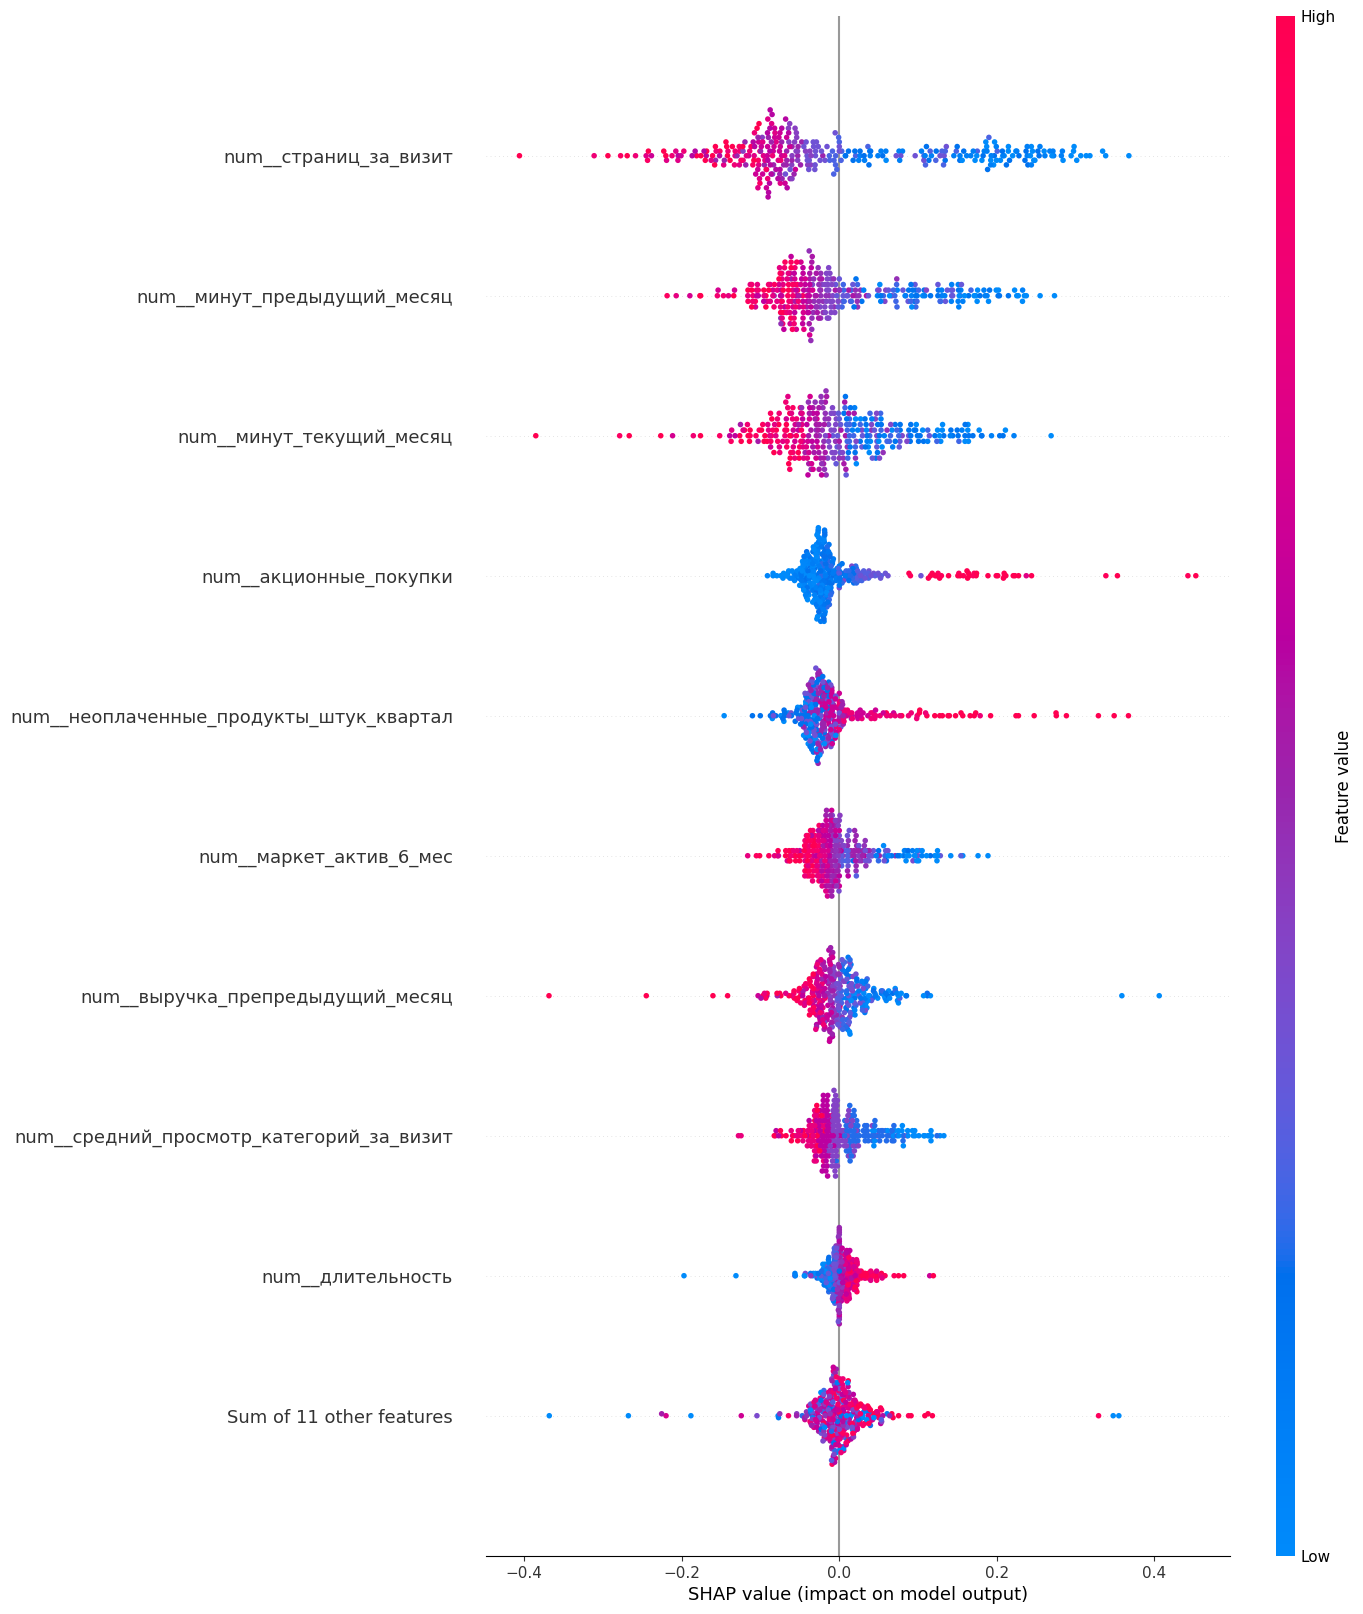

In [60]:
shap.plots.beeswarm(shap_values, plot_size=(12, 20))

### Итог
Наиболее сильное влияние на отнесение к классу 1 показали 'акционные_покупки' (в больше мере) и 'неоплаченные_продукты_штук_квартал' (в меньшей). 
То есть клиенты, у которых много товаров лежит в корзине и которые часто покупают товары по акции, склонны к сниженинию активности.

## Сегментация покупателей

Возьмём в качестве сегмента тех клиентов, у которых самая популярная категория 'Мелкая бытовая техника и электроника'

In [61]:
market_full_money = market_full.merge(
    money,
    on='id'
)

market_segment = market_full_money[market_full_money['популярная_категория'] == 'Мелкая бытовая техника и электроника'].copy()
market_segment.drop('популярная_категория', axis=1)
market_segment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, 50 to 1294
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   174 non-null    int64  
 1   покупательская_активность            174 non-null    object 
 2   тип_сервиса                          174 non-null    object 
 3   разрешить_сообщать                   174 non-null    bool   
 4   маркет_актив_6_мес                   174 non-null    float64
 5   маркет_актив_тек_мес                 174 non-null    int64  
 6   длительность                         174 non-null    int64  
 7   акционные_покупки                    174 non-null    float64
 8   популярная_категория                 174 non-null    object 
 9   средний_просмотр_категорий_за_визит  174 non-null    int64  
 10  неоплаченные_продукты_штук_квартал   174 non-null    int64  
 11  ошибка_сервиса                     

Посмотрим, как ключевые для снижения активности признаки ('неоплаченные_продукты_штук_квартал' и 'акционные_покупки') влияют в данном сегменте

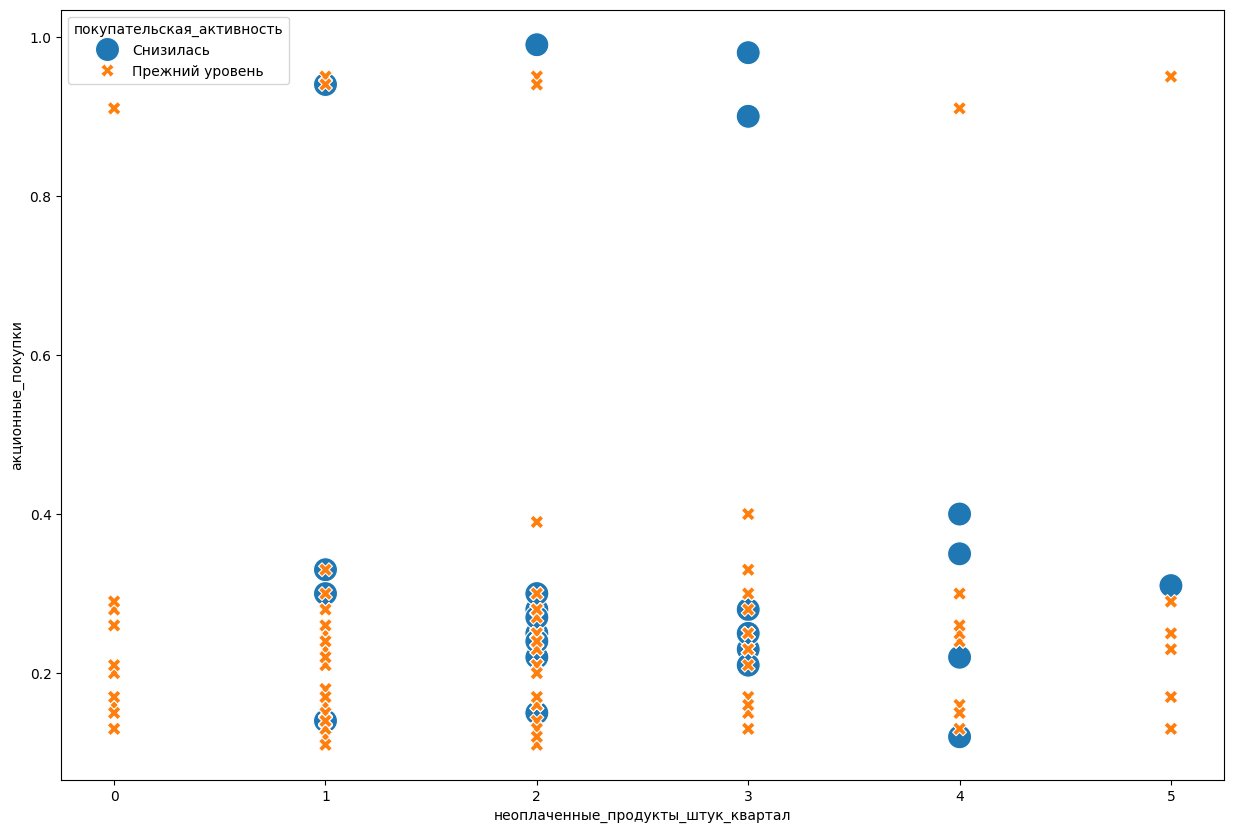

In [62]:
plt.figure(figsize=(15, 10))

sns.scatterplot(
    data=market_segment,
    x='неоплаченные_продукты_штук_квартал',
    y='акционные_покупки',
    hue='покупательская_активность',
    style='покупательская_активность',
    size='покупательская_активность',
    sizes=(100, 300)
)
        
plt.show()

Из этого представления ничего не ясно, попробуем группировать.
Разделим на 4 группы - по доле (0.5) и количеству товаров в корзине (0-2 и 3-5)

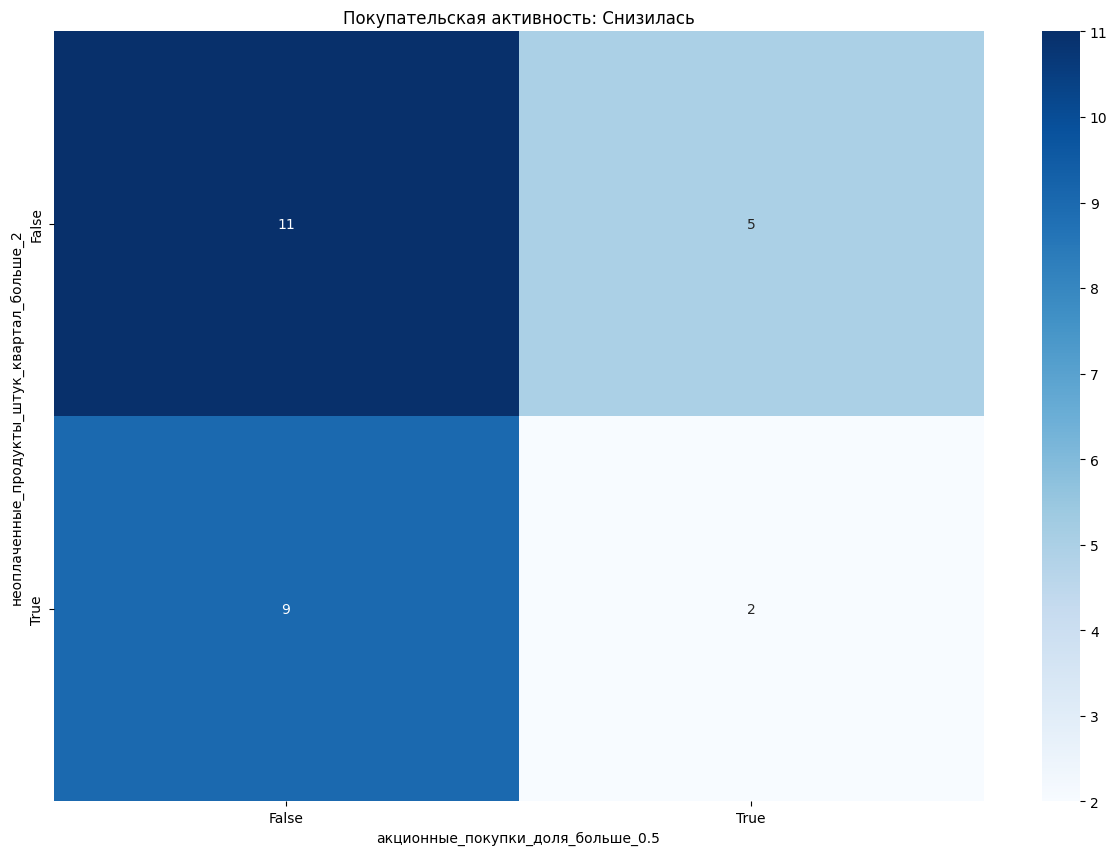

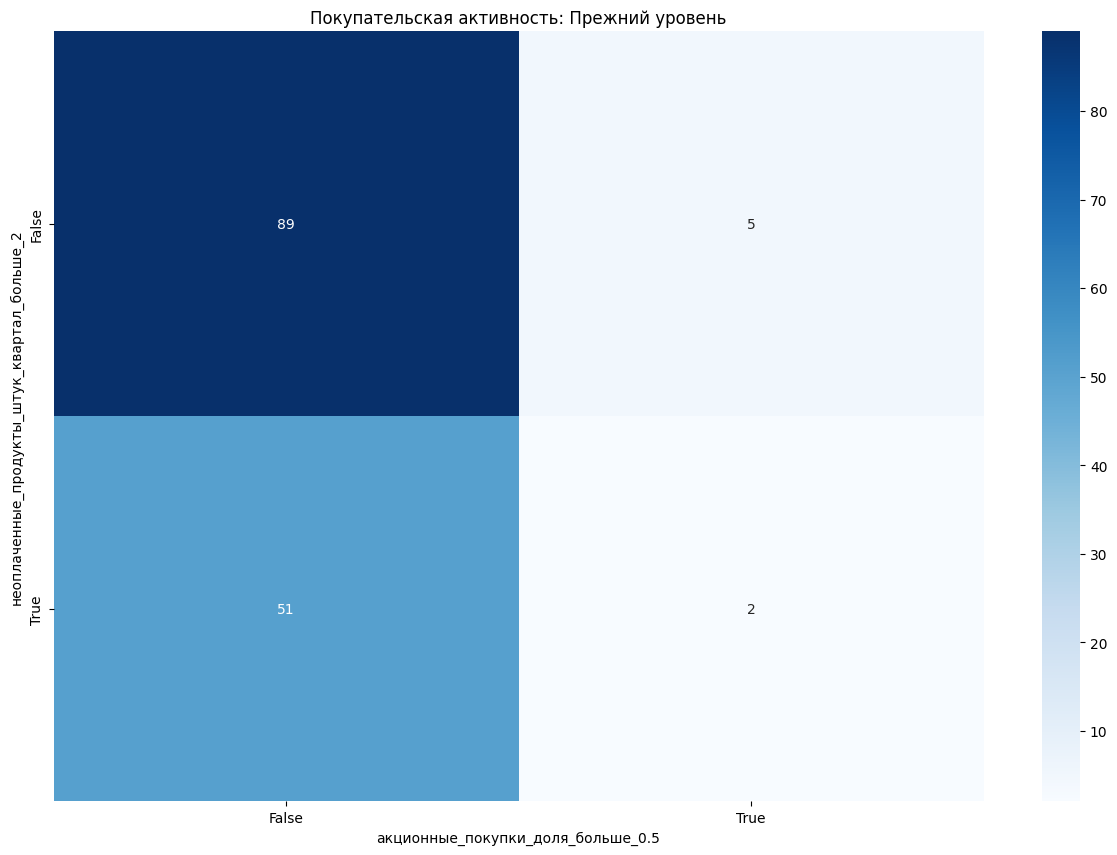

In [63]:
for cat in market_segment['покупательская_активность'].unique():
    
    tmp = market_segment[market_segment['покупательская_активность'] == cat].copy()
    tmp['неоплаченные_продукты_штук_квартал_больше_2'] = tmp['неоплаченные_продукты_штук_квартал'] > 2
    tmp['акционные_покупки_доля_больше_0.5'] = tmp['акционные_покупки'] > 0.5

    plt.figure(figsize=(15, 10))
    sns.heatmap(
        pd.crosstab(
            tmp['неоплаченные_продукты_штук_квартал_больше_2'],
            tmp['акционные_покупки_доля_больше_0.5']
        ), 
        cmap="Blues", 
        annot=True)
    
    plt.title(f'Покупательская активность: {cat}')
    
    plt.show()

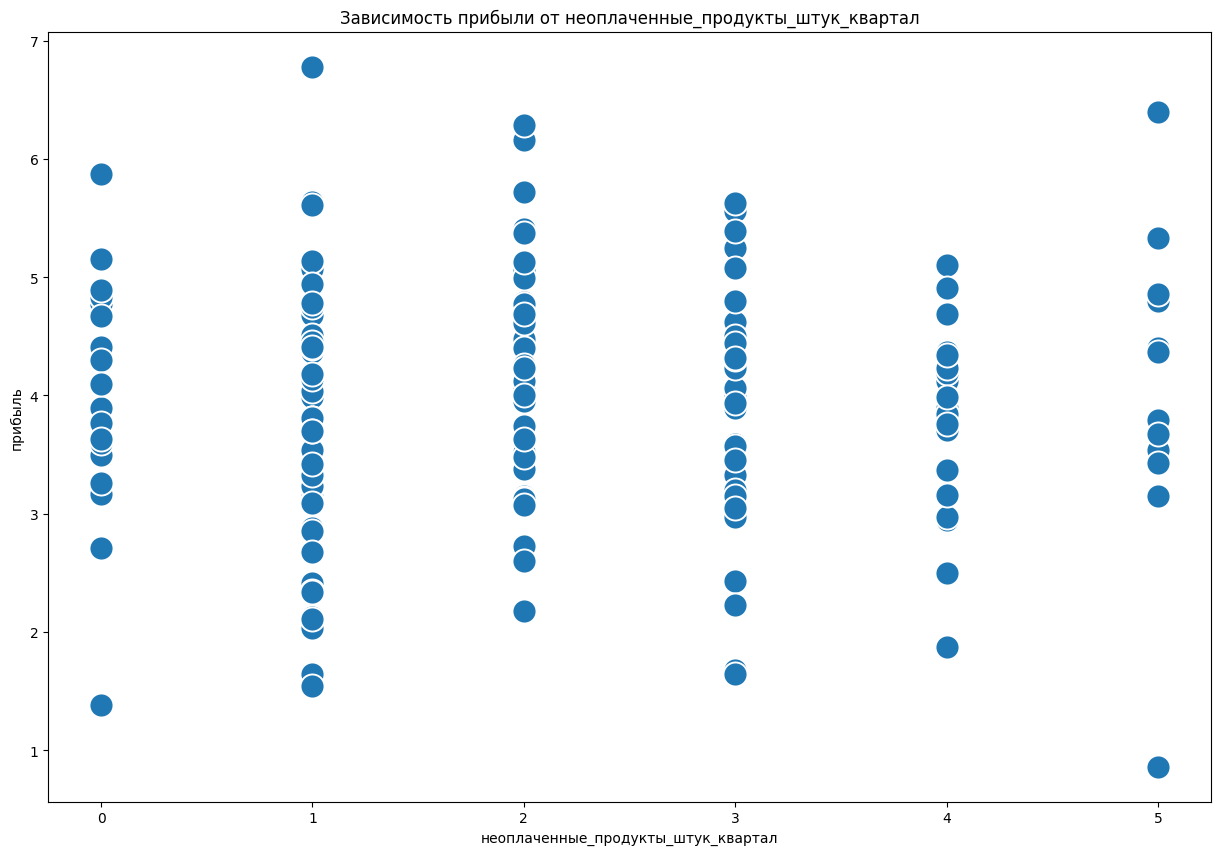

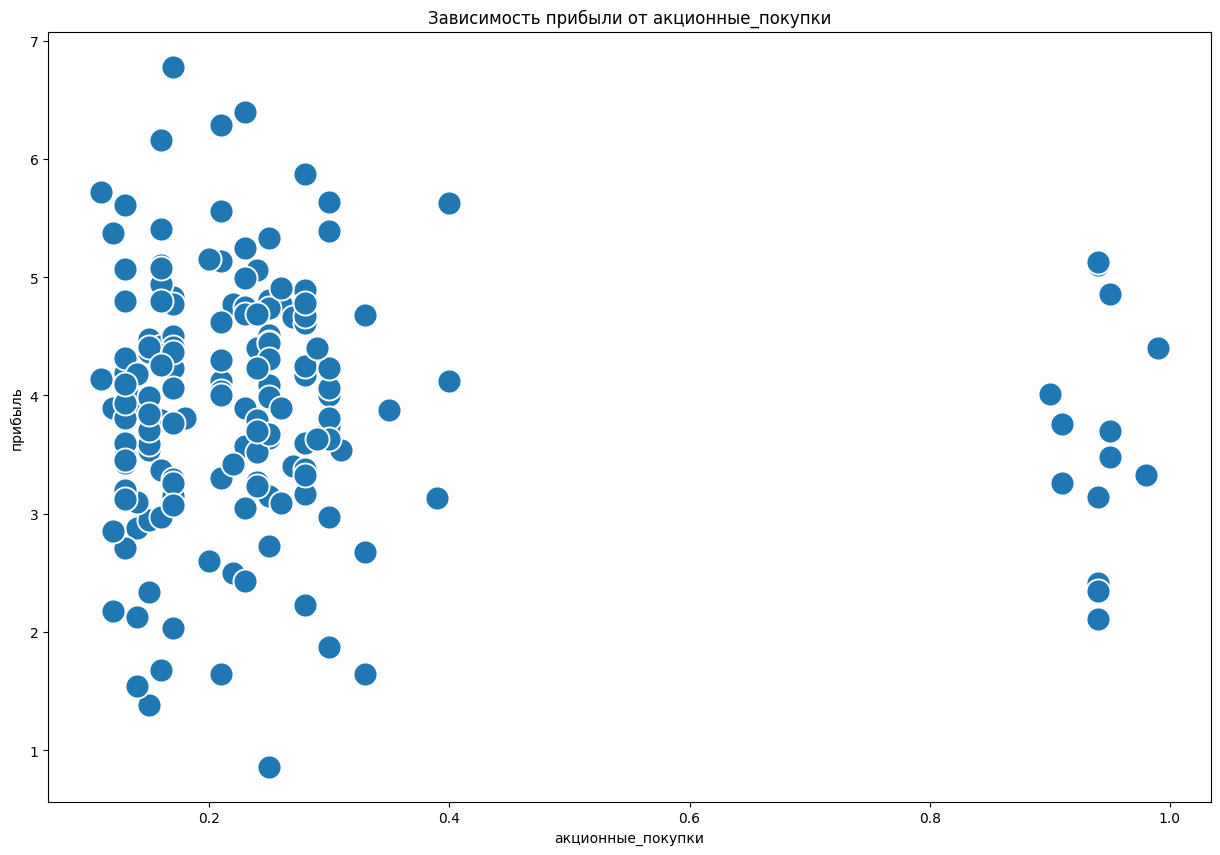

In [64]:
for cat in ['неоплаченные_продукты_штук_квартал',  'акционные_покупки']:

    plt.figure(figsize=(15, 10))

    sns.scatterplot(
        data=market_segment,
        x=cat,
        y='прибыль',
        s=300
    )
    
    plt.title(f'Зависимость прибыли от {cat}')
        
    plt.show()

### Итог
Из графика `Покупательская активность: Снизилась` видно, что сильнее всего снижается активность у покупателей, у которых мало акционых покупок. 
Это совершенно не бьётся с данными SHAP. 
Вероятно, для этого сегмента картина другая из-за специфики товаров - технику и электронику покупают не очень часто и как правило надолго.
Если так, то вариантом стимулировать активность будут промоакции на товары из категории. 
Например, на те, что часто лежат в корзинах покупателей.

## Итоговые выводы

Задача - разработать решение, которое позволит персонализировать предложения постоянным клиентам, 
чтобы увеличить их покупательскую активность.

Исходные данные содержат инфомацию о клиентах и их активности за последние 1-2-3-6 месяцев, а именно:
- выручку за 3 месяца
- проведенное на сайте время за 2 месяца
- количество посещённых страниц
- популярную у клиента категорию
- количество отложенных в корзину товары
- ошибки сайта 
- срок регистрации на сайте
- долю акционных покупок от суммарных
- наличие премиума (подписки?)
- разрешение на рассылку
- уровень покупательской активности (т.е. целевой признак)

Предобработка потребовалась минимальная - пропусков и дубликатов нет, только пара мелких опечаток.


Задача может быть сведена к бинарной классификации, поэтому были опробованы 4 модели:
- метод ближайших соседей
- решаюшее дерево
- логистическая регрессия
- метод опорных векторов

Для моделей были проварьированы гиперпараметры (в том же порядке):
- количество соседей
- максимальная глубина дерева
- сила L2 регуляризации
- тип ядра

С помощью GridSearchCV был проведен перебор всех возмодных сочетаний и была выбрана модель, 
которая обеспечила наилучшее значение roc-auc.
Такой моделью оказалась SVC с ядром rbf и с OneHotEncoder и StandardScaler для категориальных и численных признаков соотвественно.


Был выделен и проанализирован сегмент покупателей, 
предложены меры для увеличения его покупательской активности.